# Import packages

In [1]:
library(foreign)

In [2]:
library(plyr)

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
library(ggplot2)

In [5]:
library(tidyr)

In [6]:
install.packages("epiR", repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
library(epiR)

Loading required package: survival
Package epiR 1.0-2 is loaded
Type help(epi.about) for summary information




In [8]:
install.packages("gmodels", repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
library(gmodels)

In [10]:
install.packages("gplots", repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:
library(gplots)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [12]:
options(scipen = 999)

# Variable preparation - Select only related variable needed then scoring to each ID's

In [13]:
#Diabetes Dependent Variable and medication

b3b_cd3 <- read.dta("b3b_cd3.dta") 
head(b3b_cd3)
str(b3b_cd3)
diabetes_medication <- b3b_cd3 %>%
                select(hhid14_9, hhid14, pidlink, cdtype, cd05, cd09) %>% 
                filter(cdtype == 'B')
diabetes_medication <- rename(diabetes_medication, "diabetes" = cd05, "medication" = cd09)
head(diabetes_medication)
str(diabetes_medication)
summary(diabetes_medication)

hhid14_9,pid14,cdtype,cd05,cd06,cd07x,cd07mth,cd07yr,cd07a,cd08,⋯,cd09b3,cd09b4,cd09b5,cd09b6,cd09c,cd10,hhid14,pidlink,version,module
001060000,1,A,3:No,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,,NA,0010600,001060001,1.3,B3B_CD3
001060000,1,B,3:No,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,,NA,0010600,001060001,1.3,B3B_CD3
001060000,1,C,3:No,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,,NA,0010600,001060001,1.3,B3B_CD3
001060000,1,D,3:No,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,,NA,0010600,001060001,1.3,B3B_CD3
001060000,1,E,3:No,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,,NA,0010600,001060001,1.3,B3B_CD3
001060000,1,F,3:No,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,,NA,0010600,001060001,1.3,B3B_CD3


'data.frame':	548112 obs. of  24 variables:
 $ hhid14_9: chr  "001060000" "001060000" "001060000" "001060000" ...
 $ pid14   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ cdtype  : chr  "A" "B" "C" "D" ...
 $ cd05    : Factor w/ 4 levels "1:Yes","3:No",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ cd06    : chr  "" "" "" "" ...
 $ cd07x   : Factor w/ 4 levels "1:Given date",..: NA NA NA NA NA NA NA NA NA NA ...
 $ cd07mth : Factor w/ 14 levels "1:January","2:Pebruary",..: NA NA NA NA NA NA NA NA NA NA ...
 $ cd07yr  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ cd07a   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ cd08    : Factor w/ 5 levels "1:Doctor","2:Paramedic",..: NA NA NA NA NA NA NA NA NA NA ...
 $ cd09    : Factor w/ 3 levels "1:Yes","3:No",..: NA NA NA NA NA NA NA NA NA NA ...
 $ cd09a   : chr  "" "" "" "" ...
 $ cd09b1  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ cd09b2  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ cd09b3  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ cd09b4  : num  NA NA NA NA NA NA NA NA 

hhid14_9,hhid14,pidlink,cdtype,diabetes,medication
001060000,0010600,001060001,B,3:No,NA
001060004,0010651,001060004,B,3:No,NA
001060000,0010600,001060007,B,3:No,NA
001060000,0010600,001060008,B,3:No,NA
001060004,0010651,001065102,B,3:No,NA
001080003,0010851,001080003,B,3:No,NA


'data.frame':	34257 obs. of  6 variables:
 $ hhid14_9  : chr  "001060000" "001060004" "001060000" "001060000" ...
 $ hhid14    : chr  "0010600" "0010651" "0010600" "0010600" ...
 $ pidlink   : chr  "001060001" "001060004" "001060007" "001060008" ...
 $ cdtype    : chr  "B" "B" "B" "B" ...
 $ diabetes  : Factor w/ 4 levels "1:Yes","3:No",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ medication: Factor w/ 3 levels "1:Yes","3:No",..: NA NA NA NA NA NA NA NA NA NA ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr ""
 - attr(*, "formats")= chr  "%10s" "%12.0g" "%2s" "%12.0g" ...
 - attr(*, "types")= int  10 255 2 255 2 255 255 255 255 255 ...
 - attr(*, "val.labels")= chr  "" "" "" "cd05" ...
 - attr(*, "var.labels")= chr  "2014 Household ID (9-digit)" "2014 PID" "Type chronic conditions" "Have a doctor/paramedic ever told you that you had [...] ?" ...
 - attr(*, "version")= int -7
 - attr(*, "label.table")=List of 6
  ..$ cd05   : Named int  1 3 8 9
  .. ..- attr(*, "names")= chr  "1:Yes"

   hhid14_9            hhid14            pidlink             cdtype         
 Length:34257       Length:34257       Length:34257       Length:34257      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
         diabetes         medication   
 1:Yes       :  779   1:Yes    :  411  
 3:No        :33462   3:No     :  368  
 8:Don't know:   16   9:Missing:    0  
 9:Missing   :    0   NA's     :33478  

In [14]:
#Physical Activity

b3b_kk2 <- read.dta("b3b_kk2.dta") 
head(b3b_kk2)
str(b3b_kk2)
summary(b3b_kk2)

activity <- b3b_kk2 %>%
    select(pidlink, kktype, kk02m, kk02n1, kk02n2, kk02o) 

# Activity first phase --> create "imperfect" pysical activity category by select pidlink who classified into certain classes
# "Imperfect" here means the categorization process did not involve MET calculation
#There are so many NA's in the result because it is "imperfect". Need to calculate MET estimation 

activity_completed <- activity %>%
    mutate(activity_categorized = case_when(kk02m == "1:Yes" & kktype == 'A' & kk02o >= 3 & kk02n1 == "2:>= 2 hours" ~ "High",
                                            kk02m == "1:Yes" & kktype == 'A' & kk02o >= 3 & kk02n1 == "1:< 2 hours" & kk02n2 == "12:>= 30 minutes" ~ "Moderate",
                                            kk02m == "1:Yes" & kktype == 'A' & kk02o >= 3 & kk02n1 == "2:>= 2 hours" ~ "Moderate",
                                            kk02m == "1:Yes" & kktype != 'A' & kk02o >= 5 & kk02n1 == "1:< 2 hours" & kk02n2 == "12:>= 30 minutes" ~ "Moderate",
                                            kk02m == "1:Yes" & kktype != 'A' & kk02o >= 5 & kk02n1 == "2:>= 2 hours" ~ "Moderate",
                                            kk02m == "3:Never" ~ "Low"),
                                  activity_categorized = factor(activity_categorized, levels=c("High", "Moderate", "Low"))) %>%
    rename("type" = kktype, "active" = kk02m, "hours" = kk02n1, "minutes" = kk02n2, "days" = kk02o) %>%
    mutate(activity_type = revalue(type, c("A" = "Vigorous", 
                                           "B" = "Moderate", 
                                           "C" = "Walking"))) %>%
    select(-type)

head(activity_completed) 


hhid14_9,pid14,kktype,kk02m,kk02n1,kk02n2,kk02o,hhid14,pidlink,version,module
001060000,1,A,3:Never,NA,NA,NA,0010600,001060001,1.3,B3B_KK2
001060000,1,B,3:Never,NA,NA,NA,0010600,001060001,1.3,B3B_KK2
001060000,1,C,1:Yes,1:< 2 hours,12:>= 30 minutes,2,0010600,001060001,1.3,B3B_KK2
001060004,1,A,3:Never,NA,NA,NA,0010651,001060004,1.3,B3B_KK2
001060004,1,B,3:Never,NA,NA,NA,0010651,001060004,1.3,B3B_KK2
001060004,1,C,1:Yes,2:>= 2 hours,22:>= 4 hours,2,0010651,001060004,1.3,B3B_KK2


'data.frame':	94389 obs. of  11 variables:
 $ hhid14_9: chr  "001060000" "001060000" "001060000" "001060004" ...
 $ pid14   : num  1 1 1 1 1 1 7 7 7 8 ...
 $ kktype  : chr  "A" "B" "C" "A" ...
 $ kk02m   : Factor w/ 3 levels "1:Yes","3:Never",..: 2 2 1 2 2 1 2 2 1 2 ...
 $ kk02n1  : Factor w/ 2 levels "1:< 2 hours",..: NA NA 1 NA NA 2 NA NA 2 NA ...
 $ kk02n2  : Factor w/ 4 levels "11:< 30 minutes",..: NA NA 2 NA NA 4 NA NA 4 NA ...
 $ kk02o   : num  NA NA 2 NA NA 2 NA NA 3 NA ...
 $ hhid14  : chr  "0010600" "0010600" "0010600" "0010651" ...
 $ pidlink : chr  "001060001" "001060001" "001060001" "001060004" ...
 $ version : num  1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 ...
 $ module  : chr  "B3B_KK2" "B3B_KK2" "B3B_KK2" "B3B_KK2" ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr ""
 - attr(*, "formats")= chr  "%10s" "%12.0g" "%2s" "%12.0g" ...
 - attr(*, "types")= int  10 255 2 255 255 255 255 8 10 255 ...
 - attr(*, "val.labels")= chr  "" "" "" "kk02m" ...
 - attr(*, "va

   hhid14_9             pid14           kktype                kk02m      
 Length:94389       Min.   : 1.000   Length:94389       1:Yes    :46452  
 Class :character   1st Qu.: 1.000   Class :character   3:Never  :47937  
 Mode  :character   Median : 2.000   Mode  :character   9:Missing:    0  
                    Mean   : 3.021                                       
                    3rd Qu.: 4.000                                       
                    Max.   :27.000                                       
                                                                         
          kk02n1                   kk02n2          kk02o      
 1:< 2 hours :32383   11:< 30 minutes :13228   Min.   :1.00   
 2:>= 2 hours:14069   12:>= 30 minutes:19155   1st Qu.:2.00   
 NA's        :47937   21:< 4 hours    : 8026   Median :5.00   
                      22:>= 4 hours   : 6043   Mean   :4.63   
                      NA's            :47937   3rd Qu.:7.00   
                              

pidlink,active,hours,minutes,days,activity_categorized,activity_type
001060001,3:Never,NA,NA,NA,Low,Vigorous
001060001,3:Never,NA,NA,NA,Low,Moderate
001060001,1:Yes,1:< 2 hours,12:>= 30 minutes,2,NA,Walking
001060004,3:Never,NA,NA,NA,Low,Vigorous
001060004,3:Never,NA,NA,NA,Low,Moderate
001060004,1:Yes,2:>= 2 hours,22:>= 4 hours,2,NA,Walking


In [15]:
# Second phase --> create column for calculating MET estimation
# Create column minute_numbers for estimation then convert long data to wide data

ceiling <- c("11:< 30 minutes" = 29, 
             "12:>= 30 minutes" = 119, 
             "21:< 4 hours" = 239,
             "22:>= 4 hours" = 240)

median <- c("11:< 30 minutes" = 20, 
            "12:>= 30 minutes" = 75, 
            "21:< 4 hours" = 180,
            "22:>= 4 hours" = 240)

floor <- c("11:< 30 minutes" = 10, 
           "12:>= 30 minutes" = 30, 
           "21:< 4 hours" = 120,
           "22:>= 4 hours" = 240)

activity_wide <- activity_completed %>%
    mutate(minutes_number = revalue(minutes, floor)) %>% #CHANGE ESTIMATION HERE
    gather(variable, value, -pidlink, -activity_type) %>%
    unite(temp, activity_type, variable) %>%
    spread(temp, value) %>%
    mutate(Vigorous_days = as.numeric(Vigorous_days), 
           Moderate_days = as.numeric(Moderate_days), 
           Walking_days = as.numeric(Walking_days),
           Vigorous_minutes_number = as.numeric(Vigorous_minutes_number),
           Moderate_minutes_number = as.numeric(Moderate_minutes_number),
           Walking_minutes_number = as.numeric(Walking_minutes_number)) 

## Unselect imperfect activity_categorized from first phase 

activity_wide_replaced_zero <- activity_wide %>%
    select(-Moderate_activity_categorized, -Walking_activity_categorized, -Vigorous_activity_categorized)

activity_wide_replaced_zero[is.na(activity_wide_replaced_zero)] <- 0

head(activity_wide_replaced_zero)
summary(activity_wide_replaced_zero)

# Calculate total days and total MET estimation 

activity_total <- activity_wide_replaced_zero %>%
    mutate("total_days" = Vigorous_days + Moderate_days + Walking_days,
           "walking_MET" = 3.3 * Walking_days * Walking_minutes_number,
           "moderate_MET" = 4.0 * Moderate_days * Moderate_minutes_number,
           "vigorous_MET" = 8.0 * Vigorous_days * Vigorous_minutes_number) %>%
    mutate("total_MET" = walking_MET + moderate_MET + vigorous_MET)

head(activity_total)
summary(activity_total)

# Calculate and categorized each person ID's physical activity tipe based on IPAQ 

activity_calculated <- activity_total %>%
    mutate(activity_calc_categorized = case_when((Vigorous_days >= 3 & Vigorous_hours == "2:>= 2 hours")
                                                 |(Vigorous_days >= 3 & vigorous_MET >= 1500) 
                                                 |(total_days >= 7 & total_MET >= 3000) ~ "0:High",
                                                 (Vigorous_days >= 3 & Vigorous_hours == "1:< 2 hours" & Vigorous_minutes == "12:>= 30 minutes")
                                                 |(Vigorous_days >= 3 & Vigorous_hours == "2:>= 2 hours")
                                                 |(total_days >= 5 & Moderate_hours == "1:< 2 hours" & Moderate_minutes == "12:>= 30 minutes")
                                                 |(total_days >= 5 & Moderate_hours == "2:>= 2 hours")
                                                 |(total_days >= 5 & Walking_hours == "1:< 2 hours" & Walking_minutes == "12:>= 30 minutes")
                                                 |(total_days >= 5 & Walking_hours == "2:>= 2 hours")
                                                 |(total_days >= 5 & total_MET >= 600) ~ "1:Moderate",
                                                 TRUE ~ "2:Low"),
                                  activity_calc_categorized = factor(activity_calc_categorized, levels=c("0:High", "1:Moderate", "2:Low")))

activity_categorized <- activity_calculated %>%
    select(pidlink, "activity_cat" = activity_calc_categorized)

head(activity_categorized) 
summary(activity_categorized)


Warning message:
“attributes are not identical across measure variables;
they will be dropped”

pidlink,Moderate_active,Moderate_days,Moderate_hours,Moderate_minutes,Moderate_minutes_number,Vigorous_active,Vigorous_days,Vigorous_hours,Vigorous_minutes,Vigorous_minutes_number,Walking_active,Walking_days,Walking_hours,Walking_minutes,Walking_minutes_number
001060001,3:Never,0,0,0,0,3:Never,0,0,0,0,1:Yes,2,1:< 2 hours,12:>= 30 minutes,30
001060004,3:Never,0,0,0,0,3:Never,0,0,0,0,1:Yes,2,2:>= 2 hours,22:>= 4 hours,240
001060007,3:Never,0,0,0,0,3:Never,0,0,0,0,1:Yes,3,2:>= 2 hours,22:>= 4 hours,240
001060008,3:Never,0,0,0,0,3:Never,0,0,0,0,1:Yes,7,2:>= 2 hours,22:>= 4 hours,240
001065102,3:Never,0,0,0,0,1:Yes,1,2:>= 2 hours,22:>= 4 hours,240,1:Yes,7,1:< 2 hours,12:>= 30 minutes,30
001080003,1:Yes,3,2:>= 2 hours,21:< 4 hours,120,1:Yes,2,2:>= 2 hours,21:< 4 hours,120,3:Never,0,0,0,0


   pidlink          Moderate_active    Moderate_days   Moderate_hours    
 Length:31463       Length:31463       Min.   :0.000   Length:31463      
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :1.000   Mode  :character  
                                       Mean   :2.498                     
                                       3rd Qu.:6.000                     
                                       Max.   :7.000                     
 Moderate_minutes   Moderate_minutes_number Vigorous_active    Vigorous_days  
 Length:31463       Min.   :  0.00          Length:31463       Min.   :0.000  
 Class :character   1st Qu.:  0.00          Class :character   1st Qu.:0.000  
 Mode  :character   Median : 10.00          Mode  :character   Median :0.000  
                    Mean   : 36.02                             Mean   :0.843  
                    3rd Qu.: 30.00                             3rd Qu.:0.000  
        

pidlink,Moderate_active,Moderate_days,Moderate_hours,Moderate_minutes,Moderate_minutes_number,Vigorous_active,Vigorous_days,Vigorous_hours,Vigorous_minutes,⋯,Walking_active,Walking_days,Walking_hours,Walking_minutes,Walking_minutes_number,total_days,walking_MET,moderate_MET,vigorous_MET,total_MET
001060001,3:Never,0,0,0,0,3:Never,0,0,0,⋯,1:Yes,2,1:< 2 hours,12:>= 30 minutes,30,2,198,0,0,198
001060004,3:Never,0,0,0,0,3:Never,0,0,0,⋯,1:Yes,2,2:>= 2 hours,22:>= 4 hours,240,2,1584,0,0,1584
001060007,3:Never,0,0,0,0,3:Never,0,0,0,⋯,1:Yes,3,2:>= 2 hours,22:>= 4 hours,240,3,2376,0,0,2376
001060008,3:Never,0,0,0,0,3:Never,0,0,0,⋯,1:Yes,7,2:>= 2 hours,22:>= 4 hours,240,7,5544,0,0,5544
001065102,3:Never,0,0,0,0,1:Yes,1,2:>= 2 hours,22:>= 4 hours,⋯,1:Yes,7,1:< 2 hours,12:>= 30 minutes,30,8,693,0,1920,2613
001080003,1:Yes,3,2:>= 2 hours,21:< 4 hours,120,1:Yes,2,2:>= 2 hours,21:< 4 hours,⋯,3:Never,0,0,0,0,5,0,1440,1920,3360


   pidlink          Moderate_active    Moderate_days   Moderate_hours    
 Length:31463       Length:31463       Min.   :0.000   Length:31463      
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :1.000   Mode  :character  
                                       Mean   :2.498                     
                                       3rd Qu.:6.000                     
                                       Max.   :7.000                     
 Moderate_minutes   Moderate_minutes_number Vigorous_active    Vigorous_days  
 Length:31463       Min.   :  0.00          Length:31463       Min.   :0.000  
 Class :character   1st Qu.:  0.00          Class :character   1st Qu.:0.000  
 Mode  :character   Median : 10.00          Mode  :character   Median :0.000  
                    Mean   : 36.02                             Mean   :0.843  
                    3rd Qu.: 30.00                             3rd Qu.:0.000  
        

pidlink,activity_cat
001060001,2:Low
001060004,2:Low
001060007,2:Low
001060008,0:High
001065102,1:Moderate
001080003,1:Moderate


   pidlink              activity_cat  
 Length:31463       0:High    : 7051  
 Class :character   1:Moderate: 9576  
 Mode  :character   2:Low     :14836  

In [16]:
#Insurance data 

b3b_ak1 <- read.dta("b3b_ak1.dta") 
head(b3b_ak1)
tail(b3b_ak1)
insurance <- b3b_ak1 %>%
    select(pidlink, ak01) %>%
    distinct()
insurance <- rename(insurance, "insurance" = ak01)
head(insurance)
str(insurance)
summary(insurance)

hhid14_9,pid14,aktype,ak02,ak03x,ak03,ak04,ak05,hhid14,pidlink,ak01,version,module
001060000,1,,NA,NA,NA,,,0010600,001060001,3:No,1.3,B3B_AK1
001060000,7,,NA,NA,NA,,,0010600,001060007,3:No,1.3,B3B_AK1
001060000,8,,NA,NA,NA,,,0010600,001060008,3:No,1.3,B3B_AK1
001060004,1,,NA,NA,NA,,,0010651,001060004,3:No,1.3,B3B_AK1
001060004,2,,NA,NA,NA,,,0010651,001065102,3:No,1.3,B3B_AK1
001080000,8,,NA,NA,NA,,,0010800,001080008,3:No,1.3,B3B_AK1


,hhid14_9,pid14,aktype,ak02,ak03x,ak03,ak04,ak05,hhid14,pidlink,ak01,version,module
201386,321300000,3,E,3:No,NA,NA,,,3213000,321300003,1:Yes,1.3,B3B_AK1
201387,321300000,3,A,1:Yes,1:Given,1999,AC,W,3213000,321300003,1:Yes,1.3,B3B_AK1
201388,321300000,3,J,3:No,NA,NA,,,3213000,321300003,1:Yes,1.3,B3B_AK1
201389,321300000,3,I,3:No,NA,NA,,,3213000,321300003,1:Yes,1.3,B3B_AK1
201390,321300000,3,C,3:No,NA,NA,,,3213000,321300003,1:Yes,1.3,B3B_AK1
201391,321300000,3,D,3:No,NA,NA,,,3213000,321300003,1:Yes,1.3,B3B_AK1


pidlink,insurance
001060001,3:No
001060007,3:No
001060008,3:No
001060004,3:No
001065102,3:No
001080008,3:No


'data.frame':	34271 obs. of  2 variables:
 $ pidlink  : chr  "001060001" "001060007" "001060008" "001060004" ...
 $ insurance: Factor w/ 4 levels "1:Yes","3:No",..: 2 2 2 2 2 2 2 2 1 1 ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr ""
 - attr(*, "formats")= chr  "%10s" "%12.0g" "%2s" "%12.0g" ...
 - attr(*, "types")= int  10 255 2 255 255 255 4 6 8 10 ...
 - attr(*, "val.labels")= chr  "" "" "" "ak02" ...
 - attr(*, "var.labels")= chr  "2014 Household ID (9-digit)" "2014 PID" "Benefit/Insurance type" "Does your program include these benefits?" ...
 - attr(*, "version")= int -7
 - attr(*, "label.table")=List of 4
  ..$ ak02 : Named int  1 3 8 9
  .. ..- attr(*, "names")= chr  "1:Yes" "3:No" "8:Don't know" "9:Missing"
  ..$ ak03x: Named int  1 8 9
  .. ..- attr(*, "names")= chr  "1:Given" "8:Don't know" "9:Missing"
  ..$ ak03 : Named int  9998 9999
  .. ..- attr(*, "names")= chr  "9998:Don't know" "9999:Missing"
  ..$ ak01 : Named int  1 3 8 9
  .. ..- attr(*, "names")

   pidlink                 insurance    
 Length:34271       1:Yes       :16712  
 Class :character   3:No        :17478  
 Mode  :character   8:Don't know:   37  
                    9:Missing   :    0  
                    NA's        :   44  

In [17]:
# Sex, age and marstat

b3a_cov <- read.dta("b3a_cov.dta") 
head(b3a_cov)
sex_age_marstat <- b3a_cov %>%
    select(hhid14_9, hhid14, pidlink, sex, age, marstat)
head(sex_age_marstat)

# Residence

bk_sc1 <- read.dta("bk_sc1.dta") 
head(bk_sc1)
str(bk_sc1)
urban_rural <- bk_sc1 %>%
    select(hhid14_9, hhid14, sc05)
urban_rural <- rename(urban_rural, "urban_rural" = sc05)
head(urban_rural)

demographic <- left_join(sex_age_marstat, urban_rural, by = c("hhid14_9","hhid14")) #merged 
head(demographic)   
str(demographic)
summary(demographic)

hhid14_9,pid14,idivwr,resvis,rspndnt,panel,age,marstat,sex,dob_day,⋯,birth_cert_reas,hhid14,stemid,pid,pidlink,cp1,cp2,cp3,version,module
001060000,1,A35,1:Yes,1:Head of household,3:New,59,2:Married,1:Male,5,⋯,5:Didn't know it was required,0010600,00106,1,001060001,CF,2:Good,2:Good,1.3,B3A_COV
001060004,1,A34,1:Yes,2:Spouse of head,3:New,28,2:Married,3:Female,98,⋯,7:Cannot show if asked /misplaced birth certificae,0010651,00106,1,001060004,BD,3:Fair,3:Fair,1.3,B3A_COV
001060000,7,A33,1:Yes,2:Spouse of head,3:New,39,2:Married,3:Female,7,⋯,NA,0010600,00106,7,001060007,BCD,1:Excellent,1:Excellent,1.3,B3A_COV
001060000,8,A33,1:Yes,3:Other HH member,3:New,16,1:Not yet married,3:Female,9,⋯,NA,0010600,00106,8,001060008,EF,1:Excellent,1:Excellent,1.3,B3A_COV
001060004,2,A35,1:Yes,1:Head of household,3:New,30,2:Married,1:Male,4,⋯,5:Didn't know it was required,0010651,00106,2,001065102,BD,2:Good,2:Good,1.3,B3A_COV
001080003,1,A35,1:Yes,1:Head of household,3:New,36,2:Married,1:Male,13,⋯,5:Didn't know it was required,0010851,00108,1,001080003,BCF,2:Good,2:Good,1.3,B3A_COV


hhid14_9,hhid14,pidlink,sex,age,marstat
001060000,0010600,001060001,1:Male,59,2:Married
001060004,0010651,001060004,3:Female,28,2:Married
001060000,0010600,001060007,3:Female,39,2:Married
001060000,0010600,001060008,3:Female,16,1:Not yet married
001060004,0010651,001065102,1:Male,30,2:Married
001080003,0010851,001080003,1:Male,36,2:Married


hhid14_9,sc05,sc10,sc12,sc13,sc14,sc15,sc21x,sc21,hhid14,sc01_14_14,sc02_14_14,sc03_14_14,version,module
001060000,2:Rural,A01,A02,A21,A35,A33,"13:Move out of the village, same province",NA,0010600,12,1,62,1.3,BK_SC1
001060004,2:Rural,A01,A11,B21,A35,A34,"14:Move out of the village, different province",NA,0010651,12,1,62,1.3,BK_SC1
001080000,2:Rural,A01,A11,A21,A31,A35,"13:Move out of the village, same province",NA,0010800,12,1,62,1.3,BK_SC1
001080003,2:Rural,A01,A02,A21,A35,A33,"14:Move out of the village, different province",NA,0010851,12,1,62,1.3,BK_SC1
001220000,2:Rural,A01,A11,A21,A33,A34,96:SAME LOCATION,NA,0012200,12,1,62,1.3,BK_SC1
001220009,1:Urban,A01,B11,B21,B32,A11,"13:Move out of the village, same province",NA,0012251,12,4,32,1.3,BK_SC1


'data.frame':	15921 obs. of  15 variables:
 $ hhid14_9  : chr  "001060000" "001060004" "001080000" "001080003" ...
 $ sc05      : Factor w/ 2 levels "1:Urban","2:Rural": 2 2 2 2 2 1 2 1 2 2 ...
 $ sc10      : chr  "A01" "A01" "A01" "A01" ...
 $ sc12      : chr  "A02" "A11" "A11" "A02" ...
 $ sc13      : chr  "A21" "B21" "A21" "A21" ...
 $ sc14      : chr  "A35" "A35" "A31" "A35" ...
 $ sc15      : chr  "A33" "A34" "A35" "A33" ...
 $ sc21x     : Factor w/ 8 levels "1:Distance given (Moved in the same village)",..: 4 5 4 5 6 4 6 2 4 5 ...
 $ sc21      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ hhid14    : chr  "0010600" "0010651" "0010800" "0010851" ...
 $ sc01_14_14: num  12 12 12 12 12 12 12 12 12 12 ...
 $ sc02_14_14: num  1 1 1 1 1 4 1 78 1 1 ...
 $ sc03_14_14: num  62 62 62 62 62 32 62 40 62 62 ...
 $ version   : num  1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 ...
 $ module    : chr  "BK_SC1" "BK_SC1" "BK_SC1" "BK_SC1" ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr 

hhid14_9,hhid14,urban_rural
001060000,0010600,2:Rural
001060004,0010651,2:Rural
001080000,0010800,2:Rural
001080003,0010851,2:Rural
001220000,0012200,2:Rural
001220009,0012251,1:Urban


hhid14_9,hhid14,pidlink,sex,age,marstat,urban_rural
001060000,0010600,001060001,1:Male,59,2:Married,2:Rural
001060004,0010651,001060004,3:Female,28,2:Married,2:Rural
001060000,0010600,001060007,3:Female,39,2:Married,2:Rural
001060000,0010600,001060008,3:Female,16,1:Not yet married,2:Rural
001060004,0010651,001065102,1:Male,30,2:Married,2:Rural
001080003,0010851,001080003,1:Male,36,2:Married,2:Rural


'data.frame':	36391 obs. of  7 variables:
 $ hhid14_9   : chr  "001060000" "001060004" "001060000" "001060000" ...
 $ hhid14     : chr  "0010600" "0010651" "0010600" "0010600" ...
 $ pidlink    : chr  "001060001" "001060004" "001060007" "001060008" ...
 $ sex        : Factor w/ 2 levels "1:Male","3:Female": 1 2 2 2 1 1 1 2 1 2 ...
 $ age        : num  59 28 39 16 30 36 26 40 55 54 ...
 $ marstat    : Factor w/ 7 levels "1:Not yet married",..: 2 2 2 1 2 2 1 2 2 2 ...
 $ urban_rural: Factor w/ 2 levels "1:Urban","2:Rural": 2 2 2 2 2 2 2 2 2 2 ...


   hhid14_9            hhid14            pidlink                sex       
 Length:36391       Length:36391       Length:36391       1:Male  :17560  
 Class :character   Class :character   Class :character   3:Female:18825  
 Mode  :character   Mode  :character   Mode  :character   NA's    :    6  
                                                                          
                                                                          
                                                                          
                                                                          
      age                     marstat       urban_rural   
 Min.   : 14.0   2:Married        :25800   1:Urban:21887  
 1st Qu.: 26.0   1:Not yet married: 7215   2:Rural:14504  
 Median : 35.0   5:Widowed        : 2366                  
 Mean   : 38.5   4:Divorced       :  819                  
 3rd Qu.: 48.0   3:Separated      :  178                  
 Max.   :998.0   (Other)          :    7      

In [18]:
#Obesity (waist and bmi)

bus_us <- read.dta("bus_us.dta") 
head(bus_us) 
str(bus_us)
obesity <- bus_us %>%
    select(pidlink, us04, us06, us06a, us04x, us06x, us06ax) %>%
    mutate("height_m" = us04/100) %>%
    mutate("bmi" = us06 / (height_m^2))
    
obesity <- rename(obesity, "height_cm" = us04, "weight_kg" = us06, "waist" = us06a, "height_reason" = us04x, "weight_reason" = us06x, "waist_reason" = us06ax)
head(obesity)
summary(obesity)

hhid14_9,pid14,us07_0,us07aa,us07ax,us07a1,us07a2,us07ap,us07a_cd,us07a_1,⋯,us18,us18b_hr,us18b_min,us18b_ket,us14,us18c,hhid14,pidlink,version,module
001060000,1,1:Enter 1 to continue,3:No,1:Yes,146,93,114,NA,1:Left,⋯,3:No,17,5,1,6,W,0010600,001060001,1.3,BUS_US
001060004,1,1:Enter 1 to continue,3:No,1:Yes,113,70,85,NA,1:Left,⋯,3:No,20,0,2,7,W,0010651,001060004,1.3,BUS_US
001060000,7,1:Enter 1 to continue,3:No,1:Yes,112,70,49,NA,1:Left,⋯,3:No,6,30,1,5,W,0010600,001060007,1.3,BUS_US
001060000,8,1:Enter 1 to continue,3:No,1:Yes,144,84,78,NA,1:Left,⋯,3:No,17,5,1,8,W,0010600,001060008,1.3,BUS_US
001060000,9,1:Enter 1 to continue,6:Age < 15,6:Age < 15,NA,NA,NA,NA,NA,⋯,3:No,6,30,1,5,W,0010600,001060009,1.3,BUS_US
001060000,10,1:Enter 1 to continue,6:Age < 15,6:Age < 15,NA,NA,NA,NA,NA,⋯,3:No,6,30,1,8,W,0010600,001060010,1.3,BUS_US


'data.frame':	48139 obs. of  143 variables:
 $ hhid14_9 : chr  "001060000" "001060004" "001060000" "001060000" ...
 $ pid14    : num  1 1 7 8 9 10 11 2 3 4 ...
 $ us07_0   : Factor w/ 1 level "1:Enter 1 to continue": 1 1 1 1 1 1 1 1 1 1 ...
 $ us07aa   : Factor w/ 4 levels "1:Yes","3:No",..: 2 2 2 2 3 3 3 2 3 3 ...
 $ us07ax   : Factor w/ 5 levels "1:Yes","3:Why not measured",..: 1 1 1 1 3 3 3 1 3 3 ...
 $ us07a1   : num  146 113 112 144 NA NA NA 143 NA NA ...
 $ us07a2   : num  93 70 70 84 NA NA NA 90 NA NA ...
 $ us07ap   : num  114 85 49 78 NA NA NA 54 NA NA ...
 $ us07a_cd : num  NA NA NA NA NA NA NA NA NA NA ...
 $ us07a_1  : Factor w/ 4 levels "1:Left","3:Right",..: 1 1 1 1 NA NA NA 1 NA NA ...
 $ us07bx   : Factor w/ 5 levels "1:Yes","3:Why not measured",..: 1 1 1 1 3 3 3 1 3 3 ...
 $ us07b1   : num  138 111 107 134 NA NA NA 140 NA NA ...
 $ us07b2   : num  82 69 69 89 NA NA NA 93 NA NA ...
 $ us07bp   : num  104 85 57 79 NA NA NA 56 NA NA ...
 $ us07b_cd : num  NA NA NA NA NA N

pidlink,height_cm,weight_kg,waist,height_reason,weight_reason,waist_reason,height_m,bmi
001060001,146.5,51.8,84.3,1:Yes,1:Yes,1:Yes,1.465,24.13540
001060004,139.4,41.2,NA,1:Yes,1:Yes,6:< 40,1.394,21.20175
001060007,156.6,54.2,NA,1:Yes,1:Yes,6:< 40,1.566,22.10120
001060008,148.6,48.3,NA,1:Yes,1:Yes,6:< 40,1.486,21.87306
001060009,134.2,31.0,NA,1:Yes,1:Yes,6:< 40,1.342,17.21300
001060010,89.1,13.1,NA,1:Yes,1:Yes,6:< 40,0.891,16.50121


   pidlink            height_cm       weight_kg          waist       
 Length:48139       Min.   : 42.0   Min.   :  1.50   Min.   : 32.00  
 Class :character   1st Qu.:136.6   1st Qu.: 31.40   1st Qu.: 75.30  
 Mode  :character   Median :151.4   Median : 49.40   Median : 83.60  
                    Mean   :142.8   Mean   : 45.97   Mean   : 84.02  
                    3rd Qu.:159.7   3rd Qu.: 59.60   3rd Qu.: 92.00  
                    Max.   :198.0   Max.   :142.30   Max.   :150.00  
                    NA's   :280     NA's   :210      NA's   :34916   
            height_reason              weight_reason  
 1:Yes             :47859   1:Yes             :47929  
 3:Why not measured:  189   3:Why not measured:  194  
 7:Refused         :   91   7:Refused         :   15  
 9:Missing         :    0   9:Missing         :    1  
                                                      
                                                      
                                                      


In [19]:
#Hypertension from diagnose and using medication 
hypertension_medication <- b3b_cd3 %>%
                select(pidlink, cdtype, cd05, cd09) %>% 
                filter(cdtype == 'A')
hypertension_medication <- rename(hypertension_medication, "hypertension_diag" = cd05, "hyper_medication" = cd09)
head(hypertension_medication)
str(hypertension_medication)
summary(hypertension_medication)

#Hypertension from health measurement
head(bus_us)
hypertension <- bus_us %>%
    select(pidlink, us07a1, us07a2, us07b1, us07b2, us07c1, us07c2) %>%
    mutate("sistol" = (us07a1 + us07b1 + us07c1)/3, 
           "diastol" = (us07a2 + us07b2 + us07c2)/3) %>%
    select(pidlink, sistol, diastol) %>%
    full_join(hypertension_medication, by = "pidlink") %>%
    select(-cdtype)

head(hypertension)
summary(hypertension)

pidlink,cdtype,hypertension_diag,hyper_medication
001060001,A,3:No,NA
001060004,A,3:No,NA
001060007,A,3:No,NA
001060008,A,3:No,NA
001065102,A,3:No,NA
001080003,A,3:No,NA


'data.frame':	34257 obs. of  4 variables:
 $ pidlink          : chr  "001060001" "001060004" "001060007" "001060008" ...
 $ cdtype           : chr  "A" "A" "A" "A" ...
 $ hypertension_diag: Factor w/ 4 levels "1:Yes","3:No",..: 2 2 2 2 2 2 2 2 1 2 ...
 $ hyper_medication : Factor w/ 3 levels "1:Yes","3:No",..: NA NA NA NA NA NA NA NA 1 NA ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr ""
 - attr(*, "formats")= chr  "%10s" "%12.0g" "%2s" "%12.0g" ...
 - attr(*, "types")= int  10 255 2 255 2 255 255 255 255 255 ...
 - attr(*, "val.labels")= chr  "" "" "" "cd05" ...
 - attr(*, "var.labels")= chr  "2014 Household ID (9-digit)" "2014 PID" "Type chronic conditions" "Have a doctor/paramedic ever told you that you had [...] ?" ...
 - attr(*, "version")= int -7
 - attr(*, "label.table")=List of 6
  ..$ cd05   : Named int  1 3 8 9
  .. ..- attr(*, "names")= chr  "1:Yes" "3:No" "8:Don't know" "9:Missing"
  ..$ cd07x  : Named int  1 2 8 9
  .. ..- attr(*, "names")= chr  "1:Given

   pidlink             cdtype             hypertension_diag  hyper_medication
 Length:34257       Length:34257       1:Yes       : 4204   1:Yes    : 1130  
 Class :character   Class :character   3:No        :30035   3:No     : 3074  
 Mode  :character   Mode  :character   8:Don't know:   18   9:Missing:    0  
                                       9:Missing   :    0   NA's     :30053  

hhid14_9,pid14,us07_0,us07aa,us07ax,us07a1,us07a2,us07ap,us07a_cd,us07a_1,⋯,us18,us18b_hr,us18b_min,us18b_ket,us14,us18c,hhid14,pidlink,version,module
001060000,1,1:Enter 1 to continue,3:No,1:Yes,146,93,114,NA,1:Left,⋯,3:No,17,5,1,6,W,0010600,001060001,1.3,BUS_US
001060004,1,1:Enter 1 to continue,3:No,1:Yes,113,70,85,NA,1:Left,⋯,3:No,20,0,2,7,W,0010651,001060004,1.3,BUS_US
001060000,7,1:Enter 1 to continue,3:No,1:Yes,112,70,49,NA,1:Left,⋯,3:No,6,30,1,5,W,0010600,001060007,1.3,BUS_US
001060000,8,1:Enter 1 to continue,3:No,1:Yes,144,84,78,NA,1:Left,⋯,3:No,17,5,1,8,W,0010600,001060008,1.3,BUS_US
001060000,9,1:Enter 1 to continue,6:Age < 15,6:Age < 15,NA,NA,NA,NA,NA,⋯,3:No,6,30,1,5,W,0010600,001060009,1.3,BUS_US
001060000,10,1:Enter 1 to continue,6:Age < 15,6:Age < 15,NA,NA,NA,NA,NA,⋯,3:No,6,30,1,8,W,0010600,001060010,1.3,BUS_US


pidlink,sistol,diastol,hypertension_diag,hyper_medication
001060001,139.0000,85.66667,3:No,NA
001060004,107.6667,69.66667,3:No,NA
001060007,110.6667,70.33333,3:No,NA
001060008,138.6667,83.66667,3:No,NA
001060009,NA,NA,NA,NA
001060010,NA,NA,NA,NA


   pidlink              sistol         diastol          hypertension_diag
 Length:49761       Min.   : 78.0   Min.   : 38.33   1:Yes       : 4204  
 Class :character   1st Qu.:114.0   1st Qu.: 70.67   3:No        :30035  
 Mode  :character   Median :123.7   Median : 77.33   8:Don't know:   18  
                    Mean   :128.0   Mean   : 78.67   9:Missing   :    0  
                    3rd Qu.:136.3   3rd Qu.: 85.00   NA's        :15504  
                    Max.   :240.7   Max.   :153.33                       
                    NA's   :17337   NA's   :17337                        
  hyper_medication
 1:Yes    : 1130  
 3:No     : 3074  
 9:Missing:    0  
 NA's     :45557  
                  
                  
                  

In [20]:
#Education

b3a_dl1 <- read.dta("b3a_dl1.dta") 
head(b3a_dl1)
education <- b3a_dl1 %>%
                select(pidlink, dl06)
education <- rename(education, "education" = dl06)
head(education)

hhid14_9,pid14,dl01a,dl01f,dl01g,dl01h,dl01e,dl02,dl02a,dl03,⋯,dl16xd,dl30,dl40,dl41,dl42,dl43,hhid14,pidlink,version,module
001060000,1,N,M,M,M,13:Nias,1:Yes,1:Yes,1:Yes,⋯,NA,NA,,NA,NA,,0010600,001060001,1.3,B3A_DL1
001060004,1,N,M,M,M,96:None,1:Yes,1:Yes,1:Yes,⋯,2:New respondent,3:No,,NA,NA,,0010651,001060004,1.3,B3A_DL1
001060000,7,N,M,M,M,13:Nias,3:No,3:No,3:No,⋯,2:New respondent,3:No,,NA,NA,,0010600,001060007,1.3,B3A_DL1
001060000,8,WN,M,M,M,13:Nias,1:Yes,1:Yes,1:Yes,⋯,2:New respondent,1:Yes,A,3:No,3:No,,0010600,001060008,1.3,B3A_DL1
001060004,2,N,M,M,M,13:Nias,1:Yes,1:Yes,1:Yes,⋯,2:New respondent,3:No,,NA,NA,,0010651,001065102,1.3,B3A_DL1
001080003,1,N,M,M,M,13:Nias,3:No,3:No,3:No,⋯,2:New respondent,3:No,,NA,NA,,0010851,001080003,1.3,B3A_DL1


pidlink,education
001060001,2:Elementary school
001060004,2:Elementary school
001060007,2:Elementary school
001060008,3:Junior high general
001065102,3:Junior high general
001080003,2:Elementary school


In [21]:
# Depression

b3b_kp <- read.dta("b3b_kp.dta") 
str(b3b_kp)
summary(b3b_kp)
head(b3b_kp)

#coding by separate into two categorized, depressing (+) and undepressing (-) then merge them
depressing <- subset(b3b_kp, kptype %in% c('A', 'B', 'C', 'D', 'F', 'G', 'I', 'J'))
undepressing <- subset(b3b_kp, kptype %in% c('E', 'H'))

depressing_score <- depressing %>%
                        mutate(score = revalue(kp02, c("1:Rarely or none (<= 1 day)" = 0, 
                                                       "2:Some days (1-2 days)" = 1, 
                                                       "3:Occasionally (3-4 days)" = 2,
                                                        "4:Most of the time (5-7 days)" = 3)))

undepressing_score <- undepressing %>%
                        mutate(score = revalue(kp02, c("1:Rarely or none (<= 1 day)" = 3, 
                                                       "2:Some days (1-2 days)" = 2, 
                                                       "3:Occasionally (3-4 days)" = 1,
                                                        "4:Most of the time (5-7 days)" = 0)))

depression_score_merged <- union(depressing_score, undepressing_score)

#aggregate sum of score each person 
depression_score_merged$score <- as.integer(depression_score_merged$score)

depression <- depression_score_merged %>%
                    select(pidlink, score) %>%
                    group_by(pidlink) %>%
                    summarize_all(sum) 
depression <- rename(depression, "depression_score" = score)
head(depression)
str(depression)
summary(depression)

'data.frame':	314470 obs. of  8 variables:
 $ hhid14_9: chr  "001060000" "001060000" "001060000" "001060000" ...
 $ pid14   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ kptype  : chr  "A" "B" "C" "D" ...
 $ kp02    : Factor w/ 5 levels "1:Rarely or none (<= 1 day)",..: 1 1 1 1 3 1 1 4 3 3 ...
 $ hhid14  : chr  "0010600" "0010600" "0010600" "0010600" ...
 $ pidlink : chr  "001060001" "001060001" "001060001" "001060001" ...
 $ version : num  1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 ...
 $ module  : chr  "B3B_KP" "B3B_KP" "B3B_KP" "B3B_KP" ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr ""
 - attr(*, "formats")= chr  "%10s" "%12.0g" "%2s" "%12.0g" ...
 - attr(*, "types")= int  10 255 2 255 8 10 255 8
 - attr(*, "val.labels")= chr  "" "" "" "kp02" ...
 - attr(*, "var.labels")= chr  "2014 Household ID (9-digit)" "2014 PID" "TYPE OF KP FEELINGS" "How often" ...
 - attr(*, "version")= int -7
 - attr(*, "label.table")=List of 1
  ..$ kp02: Named int  1 2 3 4 9
  .. ..- attr(*, "names")= 

   hhid14_9             pid14          kptype         
 Length:314470      Min.   : 1.00   Length:314470     
 Class :character   1st Qu.: 1.00   Class :character  
 Mode  :character   Median : 2.00   Mode  :character  
                    Mean   : 3.02                     
                    3rd Qu.: 4.00                     
                    Max.   :27.00                     
                            kp02           hhid14            pidlink         
 1:Rarely or none (<= 1 day)  :174397   Length:314470      Length:314470     
 2:Some days (1-2 days)       : 47524   Class :character   Class :character  
 3:Occasionally (3-4 days)    : 47259   Mode  :character   Mode  :character  
 4:Most of the time (5-7 days): 45290                                        
 9:MISSING                    :     0                                        
                                                                             
    version       module         
 Min.   :1.3   Length:314470     
 

hhid14_9,pid14,kptype,kp02,hhid14,pidlink,version,module
001060000,1,A,1:Rarely or none (<= 1 day),0010600,001060001,1.3,B3B_KP
001060000,1,B,1:Rarely or none (<= 1 day),0010600,001060001,1.3,B3B_KP
001060000,1,C,1:Rarely or none (<= 1 day),0010600,001060001,1.3,B3B_KP
001060000,1,D,1:Rarely or none (<= 1 day),0010600,001060001,1.3,B3B_KP
001060000,1,E,3:Occasionally (3-4 days),0010600,001060001,1.3,B3B_KP
001060000,1,F,1:Rarely or none (<= 1 day),0010600,001060001,1.3,B3B_KP


Warning message:
“Column `score` joining factors with different levels, coercing to character vector”

pidlink,depression_score
001060001,5
001060004,8
001060007,11
001060008,8
001065102,7
001080003,18


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	31447 obs. of  2 variables:
 $ pidlink         : chr  "001060001" "001060004" "001060007" "001060008" ...
 $ depression_score: int  5 8 11 8 7 18 10 2 13 12 ...


   pidlink          depression_score
 Length:31447       Min.   : 0.000  
 Class :character   1st Qu.: 3.000  
 Mode  :character   Median : 5.000  
                    Mean   : 6.402  
                    3rd Qu.: 9.000  
                    Max.   :30.000  

# Merge all column into one single table

In [22]:
all_merged <- diabetes_medication %>%
    left_join(activity_categorized, by = "pidlink") %>%
    left_join(hypertension, by = "pidlink") %>%
    left_join(obesity, by = "pidlink") %>%
    left_join(education, by = "pidlink") %>%
    left_join(depression, by = "pidlink") %>%
    left_join(demographic, by = "pidlink") %>%
    select(-"hhid14_9.y", -"hhid14.y") %>% 
    left_join(insurance, by = "pidlink") 
              
head(all_merged)
str(all_merged)
summary(all_merged)

hhid14_9.x,hhid14.x,pidlink,cdtype,diabetes,medication,activity_cat,sistol,diastol,hypertension_diag,⋯,waist_reason,height_m,bmi,education,depression_score,sex,age,marstat,urban_rural,insurance
001060000,0010600,001060001,B,3:No,NA,2:Low,139.0000,85.66667,3:No,⋯,1:Yes,1.465,24.13540,2:Elementary school,5,1:Male,59,2:Married,2:Rural,3:No
001060004,0010651,001060004,B,3:No,NA,2:Low,107.6667,69.66667,3:No,⋯,6:< 40,1.394,21.20175,2:Elementary school,8,3:Female,28,2:Married,2:Rural,3:No
001060000,0010600,001060007,B,3:No,NA,2:Low,110.6667,70.33333,3:No,⋯,6:< 40,1.566,22.10120,2:Elementary school,11,3:Female,39,2:Married,2:Rural,3:No
001060000,0010600,001060008,B,3:No,NA,0:High,138.6667,83.66667,3:No,⋯,6:< 40,1.486,21.87306,3:Junior high general,8,3:Female,16,1:Not yet married,2:Rural,3:No
001060004,0010651,001065102,B,3:No,NA,1:Moderate,141.6667,90.66667,3:No,⋯,6:< 40,1.581,21.68381,3:Junior high general,7,1:Male,30,2:Married,2:Rural,3:No
001080003,0010851,001080003,B,3:No,NA,1:Moderate,138.3333,95.00000,3:No,⋯,6:< 40,1.568,19.80783,2:Elementary school,18,1:Male,36,2:Married,2:Rural,3:No


'data.frame':	34257 obs. of  26 variables:
 $ hhid14_9.x       : chr  "001060000" "001060004" "001060000" "001060000" ...
 $ hhid14.x         : chr  "0010600" "0010651" "0010600" "0010600" ...
 $ pidlink          : chr  "001060001" "001060004" "001060007" "001060008" ...
 $ cdtype           : chr  "B" "B" "B" "B" ...
 $ diabetes         : Factor w/ 4 levels "1:Yes","3:No",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ medication       : Factor w/ 3 levels "1:Yes","3:No",..: NA NA NA NA NA NA NA NA NA NA ...
 $ activity_cat     : Factor w/ 3 levels "0:High","1:Moderate",..: 3 3 3 1 2 2 3 3 1 2 ...
 $ sistol           : num  139 108 111 139 142 ...
 $ diastol          : num  85.7 69.7 70.3 83.7 90.7 ...
 $ hypertension_diag: Factor w/ 4 levels "1:Yes","3:No",..: 2 2 2 2 2 2 2 2 1 2 ...
 $ hyper_medication : Factor w/ 3 levels "1:Yes","3:No",..: NA NA NA NA NA NA NA NA 1 NA ...
 $ height_cm        : num  146 139 157 149 158 ...
 $ weight_kg        : num  51.8 41.2 54.2 48.3 54.2 48.7 56.1 45.9 58.5 47.4 

  hhid14_9.x          hhid14.x           pidlink             cdtype         
 Length:34257       Length:34257       Length:34257       Length:34257      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
         diabetes         medication        activity_cat       sistol     
 1:Yes       :  779   1:Yes    :  411   0:High    : 7048   Min.   : 78.0  
 3:No        :33462   3:No     :  368   1:Moderate: 9574   1st Qu.:114.0  
 8:Don't know:   16   9:Missing:    0   2:Low     :14829   Median :123.7  
 9:Missing   :    0   NA's     :33478   NA's      : 2806   Mean   :128.0  
         

In [23]:
write.csv(all_merged, file = "unfiltered_numeric_dataset.csv")

# Data transofmation - filtering (outlier haven't been excluded yet), categorized numerical values, and recoding 

In [24]:
# Age >= 45, bmi, waist, education, insurance and depression_score is not NA, education not in pesantren
# Maybe should exclude outlier in some continous variable also (height, weight, waist, sistol and diastol)

filtered <- all_merged %>%
            filter(age >= 45,
                   !is.na(bmi),
                   !is.na(waist),
                   !is.na(education),
                   !is.na(depression_score), 
                   !is.na(insurance),
                   !education %in% c("14:Islamic School (pesantren)", "95:Other", "98:Don't Know", "99:MISSING")) %>%
            select(-waist_reason, -weight_reason, -height_reason, -cdtype, -height_cm, -weight_kg, -height_m)
            
head(filtered)
str(filtered)
summary(filtered)

hhid14_9.x,hhid14.x,pidlink,diabetes,medication,activity_cat,sistol,diastol,hypertension_diag,hyper_medication,waist,bmi,education,depression_score,sex,age,marstat,urban_rural,insurance
001060000,0010600,001060001,3:No,NA,2:Low,139.0000,85.66667,3:No,NA,84.3,24.13540,2:Elementary school,5,1:Male,59,2:Married,2:Rural,3:No
001220000,0012200,001220001,3:No,NA,0:High,198.6667,120.00000,1:Yes,1:Yes,83.8,22.40130,2:Elementary school,13,1:Male,55,2:Married,2:Rural,1:Yes
001220000,0012200,001220002,3:No,NA,1:Moderate,116.0000,78.66667,3:No,NA,70.3,19.25451,2:Elementary school,12,3:Female,54,2:Married,2:Rural,1:Yes
001240000,0012400,001240002,3:No,NA,1:Moderate,161.6667,90.00000,1:Yes,3:No,77.6,22.59041,2:Elementary school,10,3:Female,62,5:Widowed,2:Rural,3:No
001240005,0012451,001245101,3:No,NA,1:Moderate,127.0000,86.66667,1:Yes,3:No,95.1,26.26042,2:Elementary school,14,1:Male,50,2:Married,2:Rural,1:Yes
001290000,0012900,001290001,3:No,NA,2:Low,227.0000,128.00000,3:No,NA,70.8,20.59532,2:Elementary school,15,1:Male,58,2:Married,2:Rural,1:Yes


'data.frame':	8076 obs. of  19 variables:
 $ hhid14_9.x       : chr  "001060000" "001220000" "001220000" "001240000" ...
 $ hhid14.x         : chr  "0010600" "0012200" "0012200" "0012400" ...
 $ pidlink          : chr  "001060001" "001220001" "001220002" "001240002" ...
 $ diabetes         : Factor w/ 4 levels "1:Yes","3:No",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ medication       : Factor w/ 3 levels "1:Yes","3:No",..: NA NA NA NA NA NA NA NA NA NA ...
 $ activity_cat     : Factor w/ 3 levels "0:High","1:Moderate",..: 3 1 2 2 2 3 1 2 2 1 ...
 $ sistol           : num  139 199 116 162 127 ...
 $ diastol          : num  85.7 120 78.7 90 86.7 ...
 $ hypertension_diag: Factor w/ 4 levels "1:Yes","3:No",..: 2 1 2 1 1 2 2 2 2 1 ...
 $ hyper_medication : Factor w/ 3 levels "1:Yes","3:No",..: NA 1 NA 2 2 NA NA NA NA 2 ...
 $ waist            : num  84.3 83.8 70.3 77.6 95.1 70.8 91.5 91.8 77.5 81.4 ...
 $ bmi              : num  24.1 22.4 19.3 22.6 26.3 ...
 $ education        : Factor w/ 22 levels "2:

  hhid14_9.x          hhid14.x           pidlink                  diabetes   
 Length:8076        Length:8076        Length:8076        1:Yes       : 481  
 Class :character   Class :character   Class :character   3:No        :7595  
 Mode  :character   Mode  :character   Mode  :character   8:Don't know:   0  
                                                          9:Missing   :   0  
                                                                             
                                                                             
                                                                             
     medication       activity_cat      sistol          diastol      
 1:Yes    : 266   0:High    :1942   Min.   : 86.33   Min.   : 39.00  
 3:No     : 215   1:Moderate:2643   1st Qu.:123.67   1st Qu.: 75.00  
 9:Missing:   0   2:Low     :3491   Median :136.33   Median : 82.00  
 NA's     :7595                     Mean   :140.98   Mean   : 83.66  
                          

In [25]:
write.csv(filtered, file = "numeric_dataset.csv")

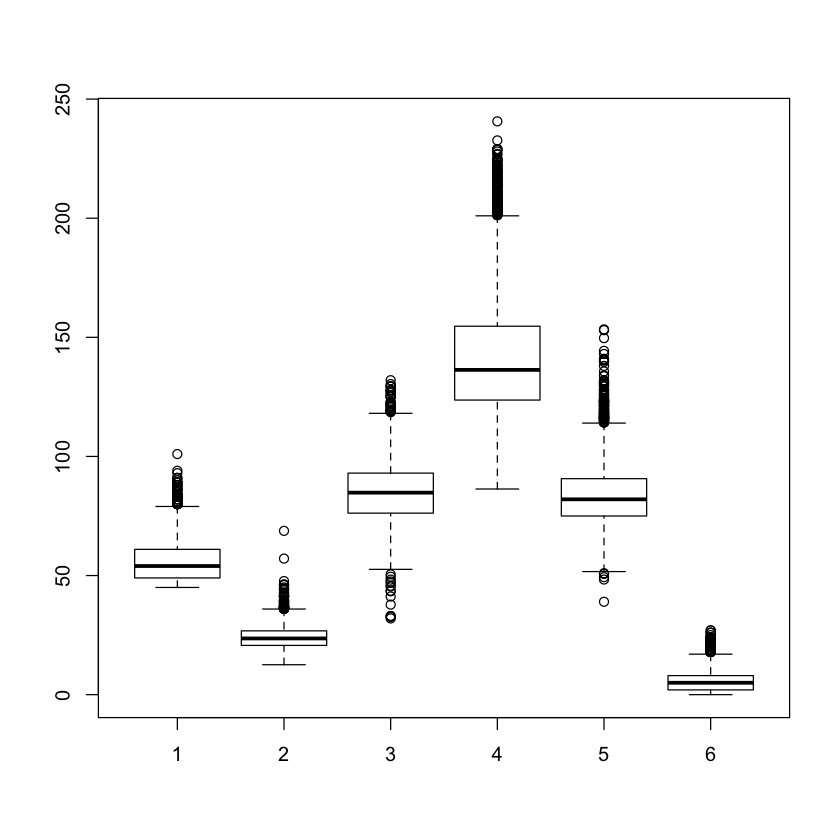

In [26]:
#Checking the outliers in numeric data. Should we exclude outliers? 

boxplot(filtered$age,
       filtered$bmi,
       filtered$waist,
       filtered$sistol,
       filtered$diastol,
       filtered$depression_score)

In [27]:
# Convert continous data to categorical data and change data type to ordered factors (ordinal data type)

dataset <- filtered %>%
            mutate(depression = as.factor(case_when(depression_score < 10 ~ "0:No",
                                          depression_score >= 10 ~ "1:Yes")),
                   depression = factor(depression, levels = c("0:No", "1:Yes")),
                   age_categorized = as.factor(case_when(age >= 45 & age <55 ~ "0:45-54",
                                               age >= 55 & age <65 ~ "1:55-64",
                                               age >= 65 & age <75 ~ "2:65-74",
                                               age >= 75 ~ "3:>=75")),
                   age_categorized = factor(age_categorized, ordered = TRUE, levels = c("0:45-54", "1:55-64", "2:65-74", "3:>=75")),
                   bmi_obesity = as.factor(case_when(bmi <18.5 ~ "0:Underweight",
                                           bmi >= 18.5 & bmi <23 ~ "1:Normal",
                                           bmi >= 23 & bmi <25 ~ "2:At risk",
                                           bmi >= 25 & bmi <30 ~ "3:Obese I",
                                           bmi >30 ~ "4:Obese II")),
                   bmi_obesity = factor(bmi_obesity, ordered = TRUE, levels = c("0:Underweight", "1:Normal", "2:At risk", "3:Obese I", "4:Obese II")),
                   waist_obesity = as.factor(case_when(waist <90 & sex == "1:Male" ~ "0:Normal",
                                             waist >=90 & sex == "1:Male" ~ "1:Obese",
                                             waist <80 & sex == "3:Female" ~ "0:Normal",
                                             waist >=80 & sex == "3:Female" ~ "1:Obese")),
                   waist_obesity = factor(waist_obesity, ordered = TRUE, levels = c("0:Normal", "1:Obese")),
                   hypertension = as.factor(case_when(sistol >= 140 | diastol >= 90 | hypertension_diag == "1:Yes"| hyper_medication == "1:Yes" ~ "1:Hypertension",
                                            TRUE ~ "0:Normal")),
                   hypertension = factor(hypertension, levels = c("0:Normal", "1:Hypertension")),
                   marstat_categorized = as.factor(revalue(marstat, c("2:Married" = "0:Married", 
                                                                       "1:Not yet married" = "1:Others",
                                                                       "3:Separated" = "1:Others",
                                                                       "4:Divorced" = "1:Others",
                                                                       "5:Widowed" = "1:Others",
                                                                       "6:Cohabitate" = "1:Others"))),
                   marstat_categorized = factor(marstat_categorized, levels = c("0:Married", "1:Others")),
                   edu_categorized = as.factor(revalue(education, c("2:Elementary school" = "2:Rendah",
                                                                      "90:Kindergarten" = "2:Rendah",
                                                                      "11:Adult education A" = "2:Rendah",
                                                                      "17:School for Disabled" = "2:Rendah",
                                                                      "72:Islamic Elementary School (Madrasah Ibtidaiyah)" = "2:Rendah",
                                                                      "3:Junior high general" = "1:Menengah",
                                                                      "12:Adult education B" = "1:Menengah",
                                                                      "4:Junior high vocational" = "1:Menengah",
                                                                      "5:Senior high general" = "1:Menengah",
                                                                      "6:Senior high vocational" = "1:Menengah",
                                                                      "15:Adult education C" = "1:Menengah",
                                                                      "73:Islamic Junior/High School (Madrasah Tsanawiyah)" = "1:Menengah",
                                                                      "74:Islamic Senior/High School (Madrasah Tsanawiyah)" = "1:Menengah",
                                                                      "60:College (D1,D2,D3)" = "0:Tinggi",
                                                                      "13:Open university" = "0:Tinggi",
                                                                      "61:University S1" = "0:Tinggi",
                                                                      "62:University S2" = "0:Tinggi",
                                                                      "63:University S3" = "0:Tinggi"))),
                    edu_categorized = factor(edu_categorized, ordered = TRUE, levels = c("0:Tinggi", "1:Menengah", "2:Rendah")),
                    diabetes = as.factor(revalue(diabetes, c("3:No" = "0:No",
                                                              "1:Yes" = "1:Yes"))),
                    diabetes = factor(diabetes, levels = c("0:No", "1:Yes")),
                    urban_rural = as.factor(revalue(urban_rural, c("2:Rural" = "1:Rural",
                                                                   "1:Urban" = "0:Urban"))),
                    urban_rural = factor(urban_rural, levels = c("0:Urban", "1:Rural")),
                    sex = as.factor(revalue(sex, c("1:Male" = "0:Male",
                                                   "3:Female" = "1:Female"))),
                    sex = factor(sex, levels = c("0:Male", "1:Female")),
                    insurance = as.factor(revalue(insurance, c("3:No" = "0:No",
                                                              "1:Yes" = "1:Yes"))),
                    insurance = factor(insurance, levels = c("0:No", "1:Yes"))) %>%
                    select(-age, -depression_score, -bmi, -waist, -sistol, -diastol, -hypertension_diag, -hyper_medication, -marstat, -education, -hhid14_9.x, -hhid14.x, -medication)

dataset <- rename(dataset, "activity" = activity_cat,
                           "residence" = urban_rural,
                           "age" = age_categorized,
                           "marital" = marstat_categorized,
                           "education" = edu_categorized)

head(dataset)
str(dataset)
summary(dataset)

pidlink,diabetes,activity,sex,residence,insurance,depression,age,bmi_obesity,waist_obesity,hypertension,marital,education
001060001,0:No,2:Low,0:Male,1:Rural,0:No,0:No,1:55-64,2:At risk,0:Normal,0:Normal,0:Married,2:Rendah
001220001,0:No,0:High,0:Male,1:Rural,1:Yes,1:Yes,1:55-64,1:Normal,0:Normal,1:Hypertension,0:Married,2:Rendah
001220002,0:No,1:Moderate,1:Female,1:Rural,1:Yes,1:Yes,0:45-54,1:Normal,0:Normal,0:Normal,0:Married,2:Rendah
001240002,0:No,1:Moderate,1:Female,1:Rural,0:No,1:Yes,1:55-64,1:Normal,0:Normal,1:Hypertension,1:Others,2:Rendah
001245101,0:No,1:Moderate,0:Male,1:Rural,1:Yes,1:Yes,0:45-54,3:Obese I,1:Obese,1:Hypertension,0:Married,2:Rendah
001290001,0:No,2:Low,0:Male,1:Rural,1:Yes,1:Yes,1:55-64,1:Normal,0:Normal,1:Hypertension,0:Married,2:Rendah


'data.frame':	8076 obs. of  13 variables:
 $ pidlink      : chr  "001060001" "001220001" "001220002" "001240002" ...
 $ diabetes     : Factor w/ 2 levels "0:No","1:Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ activity     : Factor w/ 3 levels "0:High","1:Moderate",..: 3 1 2 2 2 3 1 2 2 1 ...
 $ sex          : Factor w/ 2 levels "0:Male","1:Female": 1 1 2 2 1 1 2 1 1 1 ...
 $ residence    : Factor w/ 2 levels "0:Urban","1:Rural": 2 2 2 2 2 2 2 2 2 2 ...
 $ insurance    : Factor w/ 2 levels "0:No","1:Yes": 1 2 2 1 2 2 2 2 2 2 ...
 $ depression   : Factor w/ 2 levels "0:No","1:Yes": 1 2 2 2 2 2 1 1 2 2 ...
 $ age          : Ord.factor w/ 4 levels "0:45-54"<"1:55-64"<..: 2 2 1 2 1 2 1 2 1 1 ...
 $ bmi_obesity  : Ord.factor w/ 5 levels "0:Underweight"<..: 3 2 2 2 4 2 4 3 2 2 ...
 $ waist_obesity: Ord.factor w/ 2 levels "0:Normal"<"1:Obese": 1 1 1 1 2 1 2 2 1 1 ...
 $ hypertension : Factor w/ 2 levels "0:Normal","1:Hypertension": 1 2 1 2 2 2 1 1 1 2 ...
 $ marital      : Factor w/ 2 levels "0:Married","

   pidlink           diabetes          activity          sex      
 Length:8076        0:No :7595   0:High    :1942   0:Male  :4055  
 Class :character   1:Yes: 481   1:Moderate:2643   1:Female:4021  
 Mode  :character                2:Low     :3491                  
                                                                  
                                                                  
   residence    insurance    depression        age              bmi_obesity  
 0:Urban:4804   0:No :3997   0:No :6634   0:45-54:4267   0:Underweight: 754  
 1:Rural:3272   1:Yes:4079   1:Yes:1442   1:55-64:2541   1:Normal     :2864  
                                          2:65-74:1021   2:At risk    :1374  
                                          3:>=75 : 247   3:Obese I    :2334  
                                                         4:Obese II   : 750  
  waist_obesity          hypertension       marital          education   
 0:Normal:4075   0:Normal      :3890   0:Married:6548   

In [28]:
# Create a unordered factor for logistic regression analysis 

dataset_unordered <- filtered %>%
            mutate(depression = as.factor(case_when(depression_score < 10 ~ "0:No",
                                          depression_score >= 10 ~ "1:Yes")),
                   depression = factor(depression, levels = c("0:No", "1:Yes")),
                   age_categorized = as.factor(case_when(age >= 45 & age <55 ~ "0:45-54",
                                               age >= 55 & age <65 ~ "1:55-64",
                                               age >= 65 & age <75 ~ "2:65-74",
                                               age >= 75 ~ "3:>=75")),
                   age_categorized = factor(age_categorized, levels = c("0:45-54", "1:55-64", "2:65-74", "3:>=75")),
                   bmi_obesity = as.factor(case_when(bmi <18.5 ~ "0:Underweight",
                                           bmi >= 18.5 & bmi <23 ~ "1:Normal",
                                           bmi >= 23 & bmi <25 ~ "2:At risk",
                                           bmi >= 25 & bmi <30 ~ "3:Obese I",
                                           bmi >30 ~ "4:Obese II")),
                   bmi_obesity = factor(bmi_obesity, levels = c("0:Underweight", "1:Normal", "2:At risk", "3:Obese I", "4:Obese II")),
                   waist_obesity = as.factor(case_when(waist <90 & sex == "1:Male" ~ "0:Normal",
                                             waist >=90 & sex == "1:Male" ~ "1:Obese",
                                             waist <80 & sex == "3:Female" ~ "0:Normal",
                                             waist >=80 & sex == "3:Female" ~ "1:Obese")),
                   waist_obesity = factor(waist_obesity, levels = c("0:Normal", "1:Obese")),
                   hypertension = as.factor(case_when(sistol >= 140 | diastol >= 90 | hypertension_diag == "1:Yes"| hyper_medication == "1:Yes" ~ "1:Hypertension",
                                            TRUE ~ "0:Normal")),
                   hypertension = factor(hypertension, levels = c("0:Normal", "1:Hypertension")),
                   marstat_categorized = as.factor(revalue(marstat, c("2:Married" = "0:Married", 
                                                                       "1:Not yet married" = "1:Others",
                                                                       "3:Separated" = "1:Others",
                                                                       "4:Divorced" = "1:Others",
                                                                       "5:Widowed" = "1:Others",
                                                                       "6:Cohabitate" = "1:Others"))),
                   marstat_categorized = factor(marstat_categorized, levels = c("0:Married", "1:Others")),
                   edu_categorized = as.factor(revalue(education, c("2:Elementary school" = "2:Rendah",
                                                                      "90:Kindergarten" = "2:Rendah",
                                                                      "11:Adult education A" = "2:Rendah",
                                                                      "17:School for Disabled" = "2:Rendah",
                                                                      "72:Islamic Elementary School (Madrasah Ibtidaiyah)" = "2:Rendah",
                                                                      "3:Junior high general" = "1:Menengah",
                                                                      "12:Adult education B" = "1:Menengah",
                                                                      "4:Junior high vocational" = "1:Menengah",
                                                                      "5:Senior high general" = "1:Menengah",
                                                                      "6:Senior high vocational" = "1:Menengah",
                                                                      "15:Adult education C" = "1:Menengah",
                                                                      "73:Islamic Junior/High School (Madrasah Tsanawiyah)" = "1:Menengah",
                                                                      "74:Islamic Senior/High School (Madrasah Tsanawiyah)" = "1:Menengah",
                                                                      "60:College (D1,D2,D3)" = "0:Tinggi",
                                                                      "13:Open university" = "0:Tinggi",
                                                                      "61:University S1" = "0:Tinggi",
                                                                      "62:University S2" = "0:Tinggi",
                                                                      "63:University S3" = "0:Tinggi"))),
                    edu_categorized = factor(edu_categorized, levels = c("0:Tinggi", "1:Menengah", "2:Rendah")),
                    diabetes = as.factor(revalue(diabetes, c("3:No" = "0:No",
                                                              "1:Yes" = "1:Yes"))),
                    diabetes = factor(diabetes, levels = c("0:No", "1:Yes")),
                    urban_rural = as.factor(revalue(urban_rural, c("2:Rural" = "1:Rural",
                                                                   "1:Urban" = "0:Urban"))),
                    urban_rural = factor(urban_rural, levels = c("0:Urban", "1:Rural")),
                    sex = as.factor(revalue(sex, c("1:Male" = "0:Male",
                                                   "3:Female" = "1:Female"))),
                    sex = factor(sex, levels = c("0:Male", "1:Female")),
                    insurance = as.factor(revalue(insurance, c("3:No" = "0:No",
                                                              "1:Yes" = "1:Yes"))),
                    insurance = factor(insurance, levels = c("0:No", "1:Yes"))) %>%
                    select(-age, -depression_score, -bmi, -waist, -sistol, -diastol, -hypertension_diag, -hyper_medication, -marstat, -education, -hhid14_9.x, -hhid14.x, -medication)

dataset_unordered <- rename(dataset_unordered, "activity" = activity_cat,
                           "residence" = urban_rural,
                           "age" = age_categorized,
                           "marital" = marstat_categorized,
                           "education" = edu_categorized)

head(dataset_unordered)
str(dataset_unordered)
summary(dataset_unordered)

pidlink,diabetes,activity,sex,residence,insurance,depression,age,bmi_obesity,waist_obesity,hypertension,marital,education
001060001,0:No,2:Low,0:Male,1:Rural,0:No,0:No,1:55-64,2:At risk,0:Normal,0:Normal,0:Married,2:Rendah
001220001,0:No,0:High,0:Male,1:Rural,1:Yes,1:Yes,1:55-64,1:Normal,0:Normal,1:Hypertension,0:Married,2:Rendah
001220002,0:No,1:Moderate,1:Female,1:Rural,1:Yes,1:Yes,0:45-54,1:Normal,0:Normal,0:Normal,0:Married,2:Rendah
001240002,0:No,1:Moderate,1:Female,1:Rural,0:No,1:Yes,1:55-64,1:Normal,0:Normal,1:Hypertension,1:Others,2:Rendah
001245101,0:No,1:Moderate,0:Male,1:Rural,1:Yes,1:Yes,0:45-54,3:Obese I,1:Obese,1:Hypertension,0:Married,2:Rendah
001290001,0:No,2:Low,0:Male,1:Rural,1:Yes,1:Yes,1:55-64,1:Normal,0:Normal,1:Hypertension,0:Married,2:Rendah


'data.frame':	8076 obs. of  13 variables:
 $ pidlink      : chr  "001060001" "001220001" "001220002" "001240002" ...
 $ diabetes     : Factor w/ 2 levels "0:No","1:Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ activity     : Factor w/ 3 levels "0:High","1:Moderate",..: 3 1 2 2 2 3 1 2 2 1 ...
 $ sex          : Factor w/ 2 levels "0:Male","1:Female": 1 1 2 2 1 1 2 1 1 1 ...
 $ residence    : Factor w/ 2 levels "0:Urban","1:Rural": 2 2 2 2 2 2 2 2 2 2 ...
 $ insurance    : Factor w/ 2 levels "0:No","1:Yes": 1 2 2 1 2 2 2 2 2 2 ...
 $ depression   : Factor w/ 2 levels "0:No","1:Yes": 1 2 2 2 2 2 1 1 2 2 ...
 $ age          : Factor w/ 4 levels "0:45-54","1:55-64",..: 2 2 1 2 1 2 1 2 1 1 ...
 $ bmi_obesity  : Factor w/ 5 levels "0:Underweight",..: 3 2 2 2 4 2 4 3 2 2 ...
 $ waist_obesity: Factor w/ 2 levels "0:Normal","1:Obese": 1 1 1 1 2 1 2 2 1 1 ...
 $ hypertension : Factor w/ 2 levels "0:Normal","1:Hypertension": 1 2 1 2 2 2 1 1 1 2 ...
 $ marital      : Factor w/ 2 levels "0:Married","1:Others": 1

   pidlink           diabetes          activity          sex      
 Length:8076        0:No :7595   0:High    :1942   0:Male  :4055  
 Class :character   1:Yes: 481   1:Moderate:2643   1:Female:4021  
 Mode  :character                2:Low     :3491                  
                                                                  
                                                                  
   residence    insurance    depression        age              bmi_obesity  
 0:Urban:4804   0:No :3997   0:No :6634   0:45-54:4267   0:Underweight: 754  
 1:Rural:3272   1:Yes:4079   1:Yes:1442   1:55-64:2541   1:Normal     :2864  
                                          2:65-74:1021   2:At risk    :1374  
                                          3:>=75 : 247   3:Obese I    :2334  
                                                         4:Obese II   : 750  
  waist_obesity          hypertension       marital          education   
 0:Normal:4075   0:Normal      :3890   0:Married:6548   

In [29]:
write.csv(dataset, file = "dataset.csv")

In [30]:
write.csv(dataset_unordered, file = "dataset_unordered.csv")

# Univariate analysis (proportion tables)

In [31]:
#Proportion table diabetes prevalence each independent variable groups
    
absolute_activity_db <- table(dataset$activity, dataset$diabetes, dnn = c("Activity", "DB"))
prop_activity_db <- round(prop.table(table(dataset$activity, dataset$diabetes, dnn = c("Activity", "DB")),1),digits=2) 
absolute_activity_db
prop_activity_db

absolute_sex_db <- table(dataset$sex, dataset$diabetes, dnn = c("Sex", "DB"))
prop_sex_db <- round(prop.table(table(dataset$sex, dataset$diabetes, dnn = c("Sex", "DB")),1),digits=2) 
absolute_sex_db
prop_sex_db

absolute_residence_db <- table(dataset$residence, dataset$diabetes, dnn = c("residence", "DB"))
prop_residence_db <- round(prop.table(table(dataset$residence, dataset$diabetes, dnn = c("residence", "DB")),1),digits=2) 
absolute_residence_db
prop_residence_db

absolute_insurance_db <- table(dataset$insurance, dataset$diabetes, dnn = c("insurance", "DB"))
prop_insurance_db <- round(prop.table(table(dataset$insurance, dataset$diabetes, dnn = c("insurance", "DB")),1),digits=2) 
absolute_insurance_db
prop_insurance_db

absolute_depression_db <- table(dataset$depression, dataset$diabetes, dnn = c("depression", "DB"))
prop_depression_db <- round(prop.table(table(dataset$depression, dataset$diabetes, dnn = c("depression", "DB")),1),digits=2) 
absolute_depression_db
prop_depression_db

absolute_age_db <- table(dataset$age, dataset$diabetes, dnn = c("age", "DB"))
prop_age_db <- round(prop.table(table(dataset$age, dataset$diabetes, dnn = c("age", "DB")),1),digits=2) 
absolute_age_db
prop_age_db

absolute_bmi_obesity_db <- table(dataset$bmi_obesity, dataset$diabetes, dnn = c("bmi_obesity", "DB"))
prop_bmi_obesity_db <- round(prop.table(table(dataset$bmi_obesity, dataset$diabetes, dnn = c("bmi_obesity", "DB")),1),digits=2) 
absolute_bmi_obesity_db
prop_bmi_obesity_db

absolute_waist_obesity_db <- table(dataset$waist_obesity, dataset$diabetes, dnn = c("waist_obesity", "DB"))
prop_waist_obesity_db <- round(prop.table(table(dataset$waist_obesity, dataset$diabetes, dnn = c("waist_obesity", "DB")),1),digits=2) 
absolute_waist_obesity_db
prop_waist_obesity_db

absolute_hypertension_db <- table(dataset$hypertension, dataset$diabetes, dnn = c("hypertension", "DB"))
prop_hypertension_db <- round(prop.table(table(dataset$hypertension, dataset$diabetes, dnn = c("hypertension", "DB")),1),digits=2) 
absolute_hypertension_db
prop_hypertension_db

absolute_marital_db <- table(dataset$marital, dataset$diabetes, dnn = c("marital", "DB"))
prop_marital_db <- round(prop.table(table(dataset$marital, dataset$diabetes, dnn = c("marital", "DB")),1),digits=2) 
absolute_marital_db
prop_marital_db

absolute_education_db <- table(dataset$education, dataset$diabetes, dnn = c("education", "DB"))
prop_education_db <- round(prop.table(table(dataset$education, dataset$diabetes, dnn = c("education", "DB")),1),digits=2) 
absolute_education_db
prop_education_db
 

            DB
Activity     0:No 1:Yes
  0:High     1874    68
  1:Moderate 2482   161
  2:Low      3239   252

            DB
Activity     0:No 1:Yes
  0:High     0.96  0.04
  1:Moderate 0.94  0.06
  2:Low      0.93  0.07

          DB
Sex        0:No 1:Yes
  0:Male   3829   226
  1:Female 3766   255

          DB
Sex        0:No 1:Yes
  0:Male   0.94  0.06
  1:Female 0.94  0.06

         DB
residence 0:No 1:Yes
  0:Urban 4435   369
  1:Rural 3160   112

         DB
residence 0:No 1:Yes
  0:Urban 0.92  0.08
  1:Rural 0.97  0.03

         DB
insurance 0:No 1:Yes
    0:No  3806   191
    1:Yes 3789   290

         DB
insurance 0:No 1:Yes
    0:No  0.95  0.05
    1:Yes 0.93  0.07

          DB
depression 0:No 1:Yes
     0:No  6238   396
     1:Yes 1357    85

          DB
depression 0:No 1:Yes
     0:No  0.94  0.06
     1:Yes 0.94  0.06

         DB
age       0:No 1:Yes
  0:45-54 4082   185
  1:55-64 2326   215
  2:65-74  950    71
  3:>=75   237    10

         DB
age       0:No 1:Yes
  0:45-54 0.96  0.04
  1:55-64 0.92  0.08
  2:65-74 0.93  0.07
  3:>=75  0.96  0.04

               DB
bmi_obesity     0:No 1:Yes
  0:Underweight  735    19
  1:Normal      2730   134
  2:At risk     1273   101
  3:Obese I     2156   178
  4:Obese II     701    49

               DB
bmi_obesity     0:No 1:Yes
  0:Underweight 0.97  0.03
  1:Normal      0.95  0.05
  2:At risk     0.93  0.07
  3:Obese I     0.92  0.08
  4:Obese II    0.93  0.07

             DB
waist_obesity 0:No 1:Yes
     0:Normal 3913   162
     1:Obese  3682   319

             DB
waist_obesity 0:No 1:Yes
     0:Normal 0.96  0.04
     1:Obese  0.92  0.08

                DB
hypertension     0:No 1:Yes
  0:Normal       3745   145
  1:Hypertension 3850   336

                DB
hypertension     0:No 1:Yes
  0:Normal       0.96  0.04
  1:Hypertension 0.92  0.08

           DB
marital     0:No 1:Yes
  0:Married 6156   392
  1:Others  1439    89

           DB
marital     0:No 1:Yes
  0:Married 0.94  0.06
  1:Others  0.94  0.06

            DB
education    0:No 1:Yes
  0:Tinggi    747    87
  1:Menengah 2415   172
  2:Rendah   4433   222

            DB
education    0:No 1:Yes
  0:Tinggi   0.90  0.10
  1:Menengah 0.93  0.07
  2:Rendah   0.95  0.05

In [32]:
#Proportion table for physical activity each independent variable groups
    
absolute_sex_activity <- table(dataset$sex, dataset$activity, dnn = c("Sex", "activity"))
prop_sex_activity <- round(prop.table(table(dataset$sex, dataset$activity, dnn = c("Sex", "activity")),1),digits=2) 
absolute_sex_activity
prop_sex_activity

absolute_residence_activity <- table(dataset$residence, dataset$activity, dnn = c("residence", "activity"))
prop_residence_activity <- round(prop.table(table(dataset$residence, dataset$activity, dnn = c("residence", "activity")),1),digits=2) 
absolute_residence_activity
prop_residence_activity

absolute_insurance_activity <- table(dataset$insurance, dataset$activity, dnn = c("insurance", "activity"))
prop_insurance_activity <- round(prop.table(table(dataset$insurance, dataset$activity, dnn = c("insurance", "activity")),1),digits=2) 
absolute_insurance_activity
prop_insurance_activity

absolute_depression_activity <- table(dataset$depression, dataset$activity, dnn = c("depression", "activity"))
prop_depression_activity <- round(prop.table(table(dataset$depression, dataset$activity, dnn = c("depression", "activity")),1),digits=2) 
absolute_depression_activity
prop_depression_activity

absolute_age_activity <- table(dataset$age, dataset$activity, dnn = c("age", "activity"))
prop_age_activity <- round(prop.table(table(dataset$age, dataset$activity, dnn = c("age", "activity")),1),digits=2) 
absolute_age_activity
prop_age_activity

absolute_bmi_obesity_activity <- table(dataset$bmi_obesity, dataset$activity, dnn = c("bmi_obesity", "activity"))
prop_bmi_obesity_activity <- round(prop.table(table(dataset$bmi_obesity, dataset$activity, dnn = c("bmi_obesity", "activity")),1),digits=2) 
absolute_bmi_obesity_activity
prop_bmi_obesity_activity

absolute_waist_obesity_activity <- table(dataset$waist_obesity, dataset$activity, dnn = c("waist_obesity", "activity"))
prop_waist_obesity_activity <- round(prop.table(table(dataset$waist_obesity, dataset$activity, dnn = c("waist_obesity", "activity")),1),digits=2) 
absolute_waist_obesity_activity
prop_waist_obesity_activity

absolute_hypertension_activity <- table(dataset$hypertension, dataset$activity, dnn = c("hypertension", "activity"))
prop_hypertension_activity <- round(prop.table(table(dataset$hypertension, dataset$activity, dnn = c("hypertension", "activity")),1),digits=2) 
absolute_hypertension_activity
prop_hypertension_activity

absolute_marital_activity <- table(dataset$marital, dataset$activity, dnn = c("marital", "activity"))
prop_marital_activity <- round(prop.table(table(dataset$marital, dataset$activity, dnn = c("marital", "activity")),1),digits=2) 
absolute_marital_activity
prop_marital_activity

absolute_education_activity <- table(dataset$education, dataset$activity, dnn = c("education", "activity"))
prop_education_activity <- round(prop.table(table(dataset$education, dataset$activity, dnn = c("education", "activity")),1),digits=2) 
absolute_education_activity
prop_education_activity
 

          activity
Sex        0:High 1:Moderate 2:Low
  0:Male     1191       1284  1580
  1:Female    751       1359  1911

          activity
Sex        0:High 1:Moderate 2:Low
  0:Male     0.29       0.32  0.39
  1:Female   0.19       0.34  0.48

         activity
residence 0:High 1:Moderate 2:Low
  0:Urban    977       1600  2227
  1:Rural    965       1043  1264

         activity
residence 0:High 1:Moderate 2:Low
  0:Urban   0.20       0.33  0.46
  1:Rural   0.29       0.32  0.39

         activity
insurance 0:High 1:Moderate 2:Low
    0:No    1017       1287  1693
    1:Yes    925       1356  1798

         activity
insurance 0:High 1:Moderate 2:Low
    0:No    0.25       0.32  0.42
    1:Yes   0.23       0.33  0.44

          activity
depression 0:High 1:Moderate 2:Low
     0:No    1543       2176  2915
     1:Yes    399        467   576

          activity
depression 0:High 1:Moderate 2:Low
     0:No    0.23       0.33  0.44
     1:Yes   0.28       0.32  0.40

         activity
age       0:High 1:Moderate 2:Low
  0:45-54   1135       1349  1783
  1:55-64    592        886  1063
  2:65-74    186        331   504
  3:>=75      29         77   141

         activity
age       0:High 1:Moderate 2:Low
  0:45-54   0.27       0.32  0.42
  1:55-64   0.23       0.35  0.42
  2:65-74   0.18       0.32  0.49
  3:>=75    0.12       0.31  0.57

               activity
bmi_obesity     0:High 1:Moderate 2:Low
  0:Underweight    200        237   317
  1:Normal         851        880  1133
  2:At risk        299        469   606
  3:Obese I        470        796  1068
  4:Obese II       122        261   367

               activity
bmi_obesity     0:High 1:Moderate 2:Low
  0:Underweight   0.27       0.31  0.42
  1:Normal        0.30       0.31  0.40
  2:At risk       0.22       0.34  0.44
  3:Obese I       0.20       0.34  0.46
  4:Obese II      0.16       0.35  0.49

             activity
waist_obesity 0:High 1:Moderate 2:Low
     0:Normal   1191       1278  1606
     1:Obese     751       1365  1885

             activity
waist_obesity 0:High 1:Moderate 2:Low
     0:Normal   0.29       0.31  0.39
     1:Obese    0.19       0.34  0.47

                activity
hypertension     0:High 1:Moderate 2:Low
  0:Normal         1078       1236  1576
  1:Hypertension    864       1407  1915

                activity
hypertension     0:High 1:Moderate 2:Low
  0:Normal         0.28       0.32  0.41
  1:Hypertension   0.21       0.34  0.46

           activity
marital     0:High 1:Moderate 2:Low
  0:Married   1671       2138  2739
  1:Others     271        505   752

           activity
marital     0:High 1:Moderate 2:Low
  0:Married   0.26       0.33  0.42
  1:Others    0.18       0.33  0.49

            activity
education    0:High 1:Moderate 2:Low
  0:Tinggi      142        270   422
  1:Menengah    557        870  1160
  2:Rendah     1243       1503  1909

            activity
education    0:High 1:Moderate 2:Low
  0:Tinggi     0.17       0.32  0.51
  1:Menengah   0.22       0.34  0.45
  2:Rendah     0.27       0.32  0.41

# Bivariate analysis using chi square

In [33]:
# Bivariate analysis chi square using cleaned and prepared dataset for all independent variables to diabetes

marital_db_test <- chisq.test(dataset$marital, dataset$diabetes) #marital_status 
print(marital_db_test)

sex_db_test <- chisq.test(dataset$sex, dataset$diabetes) #sex
print(sex_db_test)

edu_db_test <- chisq.test(dataset$education, dataset$diabetes) #education
print(edu_db_test)

residence_db_test <- chisq.test(dataset$residence, dataset$diabetes) #residence or urban_rural
print(residence_db_test)

insurance_db_test <- chisq.test(dataset$insurance, dataset$diabetes) #insurance
print(insurance_db_test)

activity_db_test <- chisq.test(dataset$activity, dataset$diabetes) #physical activity
print(activity_db_test)

depression_db_test <- chisq.test(dataset$depression, dataset$diabetes) #depression
print(depression_db_test)

age_db_test <- chisq.test(dataset$age, dataset$diabetes) #age
print(age_db_test)

bmi_db_test <- chisq.test(dataset$bmi_obesity, dataset$diabetes) #bmi
print(bmi_db_test)

waist_db_test <- chisq.test(dataset$waist_obesity, dataset$diabetes) #waist circumference
print(waist_db_test)

hypertension_db_test <- chisq.test(dataset$hypertension, dataset$diabetes) #hypertension
print(hypertension_db_test)



	Pearson's Chi-squared test with Yates' continuity correction

data:  dataset$marital and dataset$diabetes
X-squared = 0.032703, df = 1, p-value = 0.8565


	Pearson's Chi-squared test with Yates' continuity correction

data:  dataset$sex and dataset$diabetes
X-squared = 1.993, df = 1, p-value = 0.158


	Pearson's Chi-squared test

data:  dataset$education and dataset$diabetes
X-squared = 43.75, df = 2, p-value = 0.000000000316


	Pearson's Chi-squared test with Yates' continuity correction

data:  dataset$residence and dataset$diabetes
X-squared = 62.247, df = 1, p-value = 0.00000000000000303


	Pearson's Chi-squared test with Yates' continuity correction

data:  dataset$insurance and dataset$diabetes
X-squared = 19.17, df = 1, p-value = 0.00001196


	Pearson's Chi-squared test

data:  dataset$activity and dataset$diabetes
X-squared = 30.909, df = 2, p-value = 0.0000001942


	Pearson's Chi-squared test with Yates' continuity correction

data:  dataset$depression and dataset$diabetes
X

In [34]:
# Bivariate analysis chi square using cleaned and prepared dataset for all independent variables to physical activity

marital_act_test <- chisq.test(dataset$marital, dataset$activity) #marital_status 
print(marital_act_test)

sex_act_test <- chisq.test(dataset$sex, dataset$activity) #sex
print(sex_act_test)

edu_act_test <- chisq.test(dataset$education, dataset$activity) #education
print(edu_act_test)

residence_act_test <- chisq.test(dataset$residence, dataset$activity) #residence or urban_rural
print(residence_act_test)

insurance_act_test <- chisq.test(dataset$insurance, dataset$activity) #insurance
print(insurance_act_test)

activity_act_test <- chisq.test(dataset$activity, dataset$activity) #physical activity
print(activity_act_test)

depression_act_test <- chisq.test(dataset$depression, dataset$activity) #depression
print(depression_act_test)

age_act_test <- chisq.test(dataset$age, dataset$activity) #age
print(age_act_test)

bmi_act_test <- chisq.test(dataset$bmi_obesity, dataset$activity) #bmi
print(bmi_act_test)

waist_act_test <- chisq.test(dataset$waist_obesity, dataset$activity) #waist circumference
print(waist_act_test)

hypertension_act_test <- chisq.test(dataset$hypertension, dataset$activity) #hypertension
print(hypertension_act_test)



	Pearson's Chi-squared test

data:  dataset$marital and dataset$activity
X-squared = 46.905, df = 2, p-value = 0.00000000006526


	Pearson's Chi-squared test

data:  dataset$sex and dataset$activity
X-squared = 133.06, df = 2, p-value < 0.00000000000000022


	Pearson's Chi-squared test

data:  dataset$education and dataset$activity
X-squared = 55.845, df = 4, p-value = 0.00000000002161


	Pearson's Chi-squared test

data:  dataset$residence and dataset$activity
X-squared = 95.94, df = 2, p-value < 0.00000000000000022


	Pearson's Chi-squared test

data:  dataset$insurance and dataset$activity
X-squared = 8.4862, df = 2, p-value = 0.01436


	Pearson's Chi-squared test

data:  dataset$activity and dataset$activity
X-squared = 16152, df = 4, p-value < 0.00000000000000022


	Pearson's Chi-squared test

data:  dataset$depression and dataset$activity
X-squared = 14.022, df = 2, p-value = 0.000902


	Pearson's Chi-squared test

data:  dataset$age and dataset$activity
X-squared = 70.582, df =

# Measure of Association - Prevalence Ratio (PR)

In [35]:
# Reverse order factor level just for calculating Prevalence Ratio, because positive exposures and outcomes come first (PR)
dataset_reversed <- dataset %>%
                    mutate(diabetes = factor(diabetes, levels = rev(levels(diabetes))), 
                           activity = factor(activity, levels = rev(levels(activity))),
                           insurance = factor(insurance, levels = rev(levels(insurance))),
                           marital = factor(marital, levels = rev(levels(marital))),
                           sex = factor(sex, levels = rev(levels(sex))),
                           residence = factor(residence, levels = rev(levels(residence))),
                           depression = factor(depression, levels = rev(levels(depression))),
                           age = factor(age, levels = rev(levels(age))),
                           bmi_obesity = factor(bmi_obesity, levels = rev(levels(bmi_obesity))),
                           waist_obesity = factor(waist_obesity, levels = rev(levels(waist_obesity))),
                           hypertension = factor(hypertension, levels = rev(levels(hypertension))),
                           education = factor(education, levels = rev(levels(education))))
summary(dataset_reversed)

   pidlink           diabetes          activity          sex      
 Length:8076        1:Yes: 481   2:Low     :3491   1:Female:4021  
 Class :character   0:No :7595   1:Moderate:2643   0:Male  :4055  
 Mode  :character                0:High    :1942                  
                                                                  
                                                                  
   residence    insurance    depression        age              bmi_obesity  
 1:Rural:3272   1:Yes:4079   1:Yes:1442   3:>=75 : 247   4:Obese II   : 750  
 0:Urban:4804   0:No :3997   0:No :6634   2:65-74:1021   3:Obese I    :2334  
                                          1:55-64:2541   2:At risk    :1374  
                                          0:45-54:4267   1:Normal     :2864  
                                                         0:Underweight: 754  
  waist_obesity          hypertension       marital          education   
 1:Obese :4001   1:Hypertension:4186   1:Others :1528   

In [36]:
#Create contingency table (2 by 2 table) for PR
ins_db_table <- table(dataset_reversed$insurance, dataset_reversed$diabetes)
res_db_table <- table(dataset_reversed$residence, dataset_reversed$diabetes)
dep_db_table <- table(dataset_reversed$depression, dataset_reversed$diabetes)
waist_db_table <- table(dataset_reversed$waist_obesity, dataset_reversed$diabetes)
hyp_db_table <- table(dataset_reversed$hypertension, dataset_reversed$diabetes)
mar_db_table <- table(dataset_reversed$marital, dataset_reversed$diabetes)
sex_db_table <- table(dataset_reversed$sex, dataset_reversed$diabetes)

In [37]:
# Calculate PR for 2 by 2 table

pr_insurance <- epi.2by2(ins_db_table, method = "cross.sectional", conf.level = 0.95, units = 100, 
   outcome = "as.columns")
pr_residence <- epi.2by2(res_db_table, method = "cross.sectional", conf.level = 0.95, units = 100, 
   outcome = "as.columns")
pr_depression <- epi.2by2(dep_db_table, method = "cross.sectional", conf.level = 0.95, units = 100, 
   outcome = "as.columns")
pr_waist <- epi.2by2(waist_db_table, method = "cross.sectional", conf.level = 0.95, units = 100, 
   outcome = "as.columns")
pr_hypertension <- epi.2by2(hyp_db_table, method = "cross.sectional", conf.level = 0.95, units = 100, 
   outcome = "as.columns")
pr_marital <- epi.2by2(mar_db_table, method = "cross.sectional", conf.level = 0.95, units = 100, 
   outcome = "as.columns")
pr_sex <- epi.2by2(sex_db_table, method = "cross.sectional", conf.level = 0.95, units = 100, 
   outcome = "as.columns")

pr_insurance
pr_residence
pr_depression
pr_waist
pr_hypertension
pr_marital
pr_sex

Warning message in N0 * (N0 + N1) * a:
“NAs produced by integer overflow”Warning message in N0 * N1 * (c + a):
“NAs produced by integer overflow”Warning message in N0 * N1 * (c + a):
“NAs produced by integer overflow”Warning message in N0 * (N0 + N1) * a:
“NAs produced by integer overflow”Warning message in N0 * N1 * (c + a):
“NAs produced by integer overflow”Warning message in N0 * N1 * (c + a):
“NAs produced by integer overflow”Warning message in N0 * (N0 + N1) * a:
“NAs produced by integer overflow”Warning message in N0 * N1 * (c + a):
“NAs produced by integer overflow”Warning message in N0 * N1 * (c + a):
“NAs produced by integer overflow”Warning message in N0 * (N0 + N1) * a:
“NAs produced by integer overflow”Warning message in N0 * N1 * (c + a):
“NAs produced by integer overflow”Warning message in N0 * N1 * (c + a):
“NAs produced by integer overflow”Warning message in N0 * (N0 + N1) * a:
“NAs produced by integer overflow”Warning message in N0 * N1 * (c + a):
“NAs produced by inte

             Outcome +    Outcome -      Total        Prevalence *        Odds
Exposed +          290         3789       4079                7.11      0.0765
Exposed -          191         3806       3997                4.78      0.0502
Total              481         7595       8076                5.96      0.0633

Point estimates and 95% CIs:
-------------------------------------------------------------------
Prevalence ratio                             1.49 (1.25, 1.78)
Odds ratio                                   1.53 (1.26, 1.84)
Attrib prevalence *                          2.33 (1.30, 3.36)
Attrib prevalence in population *            1.18 (0.34, 2.02)
Attrib fraction in exposed (%)              32.79 (19.74, 43.71)
Attrib fraction in population (%)           19.77 (10.71, 27.91)
-------------------------------------------------------------------
 Test that odds ratio = 1: chi2(1) = 19.584 Pr>chi2 = < 0.001
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 popul

             Outcome +    Outcome -      Total        Prevalence *        Odds
Exposed +          112         3160       3272                3.42      0.0354
Exposed -          369         4435       4804                7.68      0.0832
Total              481         7595       8076                5.96      0.0633

Point estimates and 95% CIs:
-------------------------------------------------------------------
Prevalence ratio                             0.45 (0.36, 0.55)
Odds ratio                                   0.43 (0.34, 0.53)
Attrib prevalence *                          -4.26 (-5.24, -3.28)
Attrib prevalence in population *            -1.73 (-2.64, -0.81)
Attrib fraction in exposed (%)              -124.40 (-175.93, -82.49)
Attrib fraction in population (%)           -28.97 (-35.41, -22.83)
-------------------------------------------------------------------
 Test that odds ratio = 1: chi2(1) = 63.005 Pr>chi2 = < 0.001
 Wald confidence limits
 CI: confidence interval
 * Outcomes

             Outcome +    Outcome -      Total        Prevalence *        Odds
Exposed +           85         1357       1442                5.89      0.0626
Exposed -          396         6238       6634                5.97      0.0635
Total              481         7595       8076                5.96      0.0633

Point estimates and 95% CIs:
-------------------------------------------------------------------
Prevalence ratio                             0.99 (0.79, 1.24)
Odds ratio                                   0.99 (0.77, 1.26)
Attrib prevalence *                          -0.07 (-1.42, 1.27)
Attrib prevalence in population *            -0.01 (-0.78, 0.76)
Attrib fraction in exposed (%)              -1.27 (-27.11, 19.32)
Attrib fraction in population (%)           -0.22 (-4.33, 3.72)
-------------------------------------------------------------------
 Test that odds ratio = 1: chi2(1) = 0.012 Pr>chi2 = 0.914
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 popu

             Outcome +    Outcome -      Total        Prevalence *        Odds
Exposed +          319         3682       4001                7.97      0.0866
Exposed -          162         3913       4075                3.98      0.0414
Total              481         7595       8076                5.96      0.0633

Point estimates and 95% CIs:
-------------------------------------------------------------------
Prevalence ratio                             2.01 (1.67, 2.41)
Odds ratio                                   2.09 (1.72, 2.54)
Attrib prevalence *                          4.00 (2.97, 5.03)
Attrib prevalence in population *            1.98 (1.19, 2.77)
Attrib fraction in exposed (%)              50.14 (40.07, 58.52)
Attrib fraction in population (%)           33.25 (24.57, 40.93)
-------------------------------------------------------------------
 Test that odds ratio = 1: chi2(1) = 57.598 Pr>chi2 = < 0.001
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 popul

             Outcome +    Outcome -      Total        Prevalence *        Odds
Exposed +          336         3850       4186                8.03      0.0873
Exposed -          145         3745       3890                3.73      0.0387
Total              481         7595       8076                5.96      0.0633

Point estimates and 95% CIs:
-------------------------------------------------------------------
Prevalence ratio                             2.15 (1.78, 2.60)
Odds ratio                                   2.25 (1.85, 2.75)
Attrib prevalence *                          4.30 (3.28, 5.32)
Attrib prevalence in population *            2.23 (1.44, 3.02)
Attrib fraction in exposed (%)              53.56 (43.86, 61.59)
Attrib fraction in population (%)           37.42 (28.53, 45.20)
-------------------------------------------------------------------
 Test that odds ratio = 1: chi2(1) = 66.536 Pr>chi2 = < 0.001
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 popul

             Outcome +    Outcome -      Total        Prevalence *        Odds
Exposed +           89         1439       1528                5.82      0.0618
Exposed -          392         6156       6548                5.99      0.0637
Total              481         7595       8076                5.96      0.0633

Point estimates and 95% CIs:
-------------------------------------------------------------------
Prevalence ratio                             0.97 (0.78, 1.22)
Odds ratio                                   0.97 (0.77, 1.23)
Attrib prevalence *                          -0.16 (-1.47, 1.15)
Attrib prevalence in population *            -0.03 (-0.80, 0.74)
Attrib fraction in exposed (%)              -2.78 (-28.50, 17.79)
Attrib fraction in population (%)           -0.51 (-4.75, 3.55)
-------------------------------------------------------------------
 Test that odds ratio = 1: chi2(1) = 0.058 Pr>chi2 = 0.81
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 popul

             Outcome +    Outcome -      Total        Prevalence *        Odds
Exposed +          255         3766       4021                6.34      0.0677
Exposed -          226         3829       4055                5.57      0.0590
Total              481         7595       8076                5.96      0.0633

Point estimates and 95% CIs:
-------------------------------------------------------------------
Prevalence ratio                             1.14 (0.96, 1.35)
Odds ratio                                   1.15 (0.95, 1.38)
Attrib prevalence *                          0.77 (-0.26, 1.80)
Attrib prevalence in population *            0.38 (-0.49, 1.26)
Attrib fraction in exposed (%)              12.12 (-4.55, 26.13)
Attrib fraction in population (%)           6.42 (-2.60, 14.65)
-------------------------------------------------------------------
 Test that odds ratio = 1: chi2(1) = 2.128 Pr>chi2 = 0.145
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 populat

In [38]:
# Calculate PR for multiple exposure groups using refference group

# PR physical activity 
prevalence_activity <- dataset %>%
                select(activity, diabetes) %>%
                group_by(activity, diabetes) %>%
                filter(diabetes == "1:Yes") %>%
                count() %>%
                rename("have_db" = n)

total_activity <- dataset %>%
                select(activity) %>%
                group_by(activity) %>%
                count() %>%
                rename("total" = n)

activity_table_pr <- left_join(prevalence_activity, total_activity, by = "activity")

prev_activity <- activity_table_pr %>%
                    mutate(prevalence = have_db / total)

reff_activity_table <- prev_activity %>%
                filter(activity == "0:High") %>%
                select(prevalence)
reff_activity <- reff_activity_table$prevalence

pr_activity <- prev_activity %>%
                mutate(pr = prevalence / reff_activity)

# PR bmi obesity
prevalence_bmi_obesity <- dataset %>%
                select(bmi_obesity, diabetes) %>%
                group_by(bmi_obesity, diabetes) %>%
                filter(diabetes == "1:Yes") %>%
                count() %>%
                rename("have_db" = n)

total_bmi_obesity <- dataset %>%
                select(bmi_obesity) %>%
                group_by(bmi_obesity) %>%
                count() %>%
                rename("total" = n)

bmi_obesity_table_pr <- left_join(prevalence_bmi_obesity, total_bmi_obesity, by = "bmi_obesity")

prev_bmi_obesity <- bmi_obesity_table_pr %>%
                    mutate(prevalence = have_db / total)

reff_bmi_obesity_table <- prev_bmi_obesity %>%
                filter(bmi_obesity == "0:Underweight") %>%
                select(prevalence)

reff_bmi_obesity <- reff_bmi_obesity_table$prevalence

pr_bmi_obesity <- prev_bmi_obesity %>%
                mutate(pr = prevalence / reff_bmi_obesity)

# PR age
prevalence_age <- dataset %>%
                select(age, diabetes) %>%
                group_by(age, diabetes) %>%
                filter(diabetes == "1:Yes") %>%
                count() %>%
                rename("have_db" = n)

total_age <- dataset %>%
                select(age) %>%
                group_by(age) %>%
                count() %>%
                rename("total" = n)

age_table_pr <- left_join(prevalence_age, total_age, by = "age")

prev_age <- age_table_pr %>%
                    mutate(prevalence = have_db / total)

reff_age_table <- prev_age %>%
                filter(age == "0:45-54") %>%
                select(prevalence)

reff_age <- reff_age_table$prevalence

pr_age <- prev_age %>%
                mutate(pr = prevalence / reff_age)

# PR education
prevalence_education <- dataset %>%
                select(education, diabetes) %>%
                group_by(education, diabetes) %>%
                filter(diabetes == "1:Yes") %>%
                count() %>%
                rename("have_db" = n)

total_education <- dataset %>%
                select(education) %>%
                group_by(education) %>%
                count() %>%
                rename("total" = n)

education_table_pr <- left_join(prevalence_education, total_education, by = "education")

prev_education <- education_table_pr %>%
                    mutate(prevalence = have_db / total)

reff_education_table <- prev_education %>%
                filter(education == "0:Tinggi") %>%
                select(prevalence)

reff_education <- reff_education_table$prevalence

pr_education <- prev_education %>%
                mutate(pr = prevalence / reff_education)

pr_activity
pr_bmi_obesity
pr_age
pr_education

Adding missing grouping variables: `activity`, `diabetes`
Adding missing grouping variables: `bmi_obesity`, `diabetes`
Adding missing grouping variables: `age`, `diabetes`
Adding missing grouping variables: `education`, `diabetes`


activity,diabetes,have_db,total,prevalence,pr
0:High,1:Yes,68,1942,0.03501545,1.000000
1:Moderate,1:Yes,161,2643,0.06091563,1.739679
2:Low,1:Yes,252,3491,0.07218562,2.061536


bmi_obesity,diabetes,have_db,total,prevalence,pr
0:Underweight,1:Yes,19,754,0.02519894,1.000000
1:Normal,1:Yes,134,2864,0.04678771,1.856733
2:At risk,1:Yes,101,1374,0.07350801,2.917107
3:Obese I,1:Yes,178,2334,0.07626392,3.026474
4:Obese II,1:Yes,49,750,0.06533333,2.592702


age,diabetes,have_db,total,prevalence,pr
0:45-54,1:Yes,185,4267,0.04335599,1.0000000
1:55-64,1:Yes,215,2541,0.08461236,1.9515726
2:65-74,1:Yes,71,1021,0.06953967,1.6039230
3:>=75,1:Yes,10,247,0.04048583,0.9338002


education,diabetes,have_db,total,prevalence,pr
0:Tinggi,1:Yes,87,834,0.10431655,1.0000000
1:Menengah,1:Yes,172,2587,0.06648628,0.6373512
2:Rendah,1:Yes,222,4655,0.04769066,0.4571725


# Multivariate analysis - Logistic Regression !

In [39]:
# Take all variable into account to create a totally complete models
logit_complete <- glm(diabetes ~ activity + hypertension + waist_obesity + bmi_obesity + age + insurance + residence + education + marital + sex + depression, data=dataset, family=binomial(link="logit"))
summary(logit_complete)



Call:
glm(formula = diabetes ~ activity + hypertension + waist_obesity + 
    bmi_obesity + age + insurance + residence + education + marital + 
    sex + depression, family = binomial(link = "logit"), data = dataset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8634  -0.3912  -0.2916  -0.2127   3.1154  

Coefficients:
                           Estimate Std. Error z value             Pr(>|z|)    
(Intercept)                -3.42327    0.19630 -17.439 < 0.0000000000000002 ***
activity1:Moderate          0.35865    0.15118   2.372             0.017674 *  
activity2:Low               0.52391    0.14366   3.647             0.000265 ***
hypertension1:Hypertension  0.63944    0.10626   6.018        0.00000000177 ***
waist_obesity.L             0.38627    0.10264   3.763             0.000168 ***
bmi_obesity.L               0.02349    0.21600   0.109             0.913403    
bmi_obesity.Q              -0.47147    0.16336  -2.886             0.003902 ** 
bmi_obesity.

In [40]:
# Take only signifficant variable from previous chi square test into account 
logit_filtered <- glm(diabetes ~ activity + hypertension + waist_obesity + bmi_obesity + age + insurance + residence + education, data=dataset, family=binomial(link="logit"))
summary(logit_filtered)


Call:
glm(formula = diabetes ~ activity + hypertension + waist_obesity + 
    bmi_obesity + age + insurance + residence + education, family = binomial(link = "logit"), 
    data = dataset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8546  -0.3918  -0.2922  -0.2138   3.1056  

Coefficients:
                           Estimate Std. Error z value             Pr(>|z|)    
(Intercept)                -3.46668    0.19132 -18.120 < 0.0000000000000002 ***
activity1:Moderate          0.34699    0.15091   2.299             0.021486 *  
activity2:Low               0.50498    0.14310   3.529             0.000417 ***
hypertension1:Hypertension  0.63752    0.10621   6.002        0.00000000194 ***
waist_obesity.L             0.34445    0.09320   3.696             0.000219 ***
bmi_obesity.L               0.05683    0.21424   0.265             0.790821    
bmi_obesity.Q              -0.47703    0.16294  -2.928             0.003416 ** 
bmi_obesity.C               0.05953    0.

In [41]:
# Add interaction between sex variable and some independent variables to create a better models
logit_interaction <- glm(diabetes ~ activity + hypertension + waist_obesity + bmi_obesity + age + insurance + residence + education + marital + sex + depression 
                         + sex*activity + sex*bmi_obesity + sex*education + sex*depression, data=dataset_unordered, family=binomial(link="logit"))
summary(logit_interaction)
BIC(logit_interaction)



Call:
glm(formula = diabetes ~ activity + hypertension + waist_obesity + 
    bmi_obesity + age + insurance + residence + education + marital + 
    sex + depression + sex * activity + sex * bmi_obesity + sex * 
    education + sex * depression, family = binomial(link = "logit"), 
    data = dataset_unordered)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0081  -0.3900  -0.2843  -0.2010   3.2090  

Coefficients:
                                  Estimate Std. Error z value
(Intercept)                       -3.84152    0.45318  -8.477
activity1:Moderate                 0.16195    0.19938   0.812
activity2:Low                      0.19957    0.19188   1.040
hypertension1:Hypertension         0.62264    0.10683   5.828
waist_obesity1:Obese               0.58908    0.15619   3.772
bmi_obesity1:Normal                0.97412    0.40112   2.429
bmi_obesity2:At risk               0.78025    0.42463   1.837
bmi_obesity3:Obese I               0.64892    0.43061   1.507


[1] 3597.179